<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Investigating-factors-determining-property-value-in-Mbombela-" data-toc-modified-id="Investigating-factors-determining-property-value-in-Mbombela--0"><span class="toc-item-num">0&nbsp;&nbsp;</span><b>Investigating factors determining property value in Mbombela </b></a></span><ul class="toc-item"><li><span><a href="#Authors:" data-toc-modified-id="Authors:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Authors:</a></span></li></ul></li><li><span><a href="#Executive-Summary:" data-toc-modified-id="Executive-Summary:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>Executive Summary:</b></a></span><ul class="toc-item"><li><span><a href="#Limitations:--" data-toc-modified-id="Limitations:---1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Limitations:  </a></span></li></ul></li><li><span><a href="#Introduction:" data-toc-modified-id="Introduction:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><b>Introduction:</b></a></span></li><li><span><a href="#Research-Questions:" data-toc-modified-id="Research-Questions:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Research Questions</strong>:</a></span></li><li><span><a href="#Hypotheses:" data-toc-modified-id="Hypotheses:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Hypotheses</strong>:</a></span></li><li><span><a href="#Methodology:" data-toc-modified-id="Methodology:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Methodology</strong>:</a></span></li><li><span><a href="#-Data-Description:-" data-toc-modified-id="-Data-Description:--6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b> Data Description: </b></a></span><ul class="toc-item"><li><span><a href="#-Date-collected:-" data-toc-modified-id="-Date-collected:--6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><b> Date collected: </b></a></span></li><li><span><a href="#Dataset-before-cleaning:" data-toc-modified-id="Dataset-before-cleaning:-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><strong>Dataset before cleaning:</strong></a></span></li><li><span><a href="#Data-Quality:" data-toc-modified-id="Data-Quality:-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span><strong>Data Quality:</strong></a></span></li><li><span><a href="#-Ability-to-answer-question:-" data-toc-modified-id="-Ability-to-answer-question:--6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span><b> Ability to answer question: </b></a></span></li><li><span><a href="#-Dataset-Validation:-" data-toc-modified-id="-Dataset-Validation:--6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span><b> Dataset Validation: </b></a></span></li></ul></li><li><span><a href="#-Data-Wrangling:-" data-toc-modified-id="-Data-Wrangling:--7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b> Data Wrangling: </b></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Processing-the-data-from-column-=-Township-to-column-=-MarketValue:-" data-toc-modified-id="-Processing-the-data-from-column-=-Township-to-column-=-MarketValue:--7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span><b> Processing the data from column = Township to column = MarketValue: </b></a></span></li><li><span><a href="#-Processing-the-data-from-column-=-Supp-RollNo-to-column-=-Valuation-Type:-" data-toc-modified-id="-Processing-the-data-from-column-=-Supp-RollNo-to-column-=-Valuation-Type:--7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span><b> Processing the data from column = Supp RollNo to column = Valuation Type: </b></a></span></li><li><span><a href="#-Processing-the-data-from-column-=-Cycle-to-column-=-Val-Cnt:-" data-toc-modified-id="-Processing-the-data-from-column-=-Cycle-to-column-=-Val-Cnt:--7.0.3"><span class="toc-item-num">7.0.3&nbsp;&nbsp;</span><b> Processing the data from column = Cycle to column = Val Cnt: </b></a></span></li></ul></li><li><span><a href="#-Conclusion:-" data-toc-modified-id="-Conclusion:--7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><b> Conclusion: </b></a></span></li></ul></li><li><span><a href="#-Exploratory-Data-Analysis:-" data-toc-modified-id="-Exploratory-Data-Analysis:--8"><span class="toc-item-num">8&nbsp;&nbsp;</span><b> Exploratory Data Analysis: </b></a></span><ul class="toc-item"><li><span><a href="#-Features:" data-toc-modified-id="-Features:-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span><b> Features:</b></a></span><ul class="toc-item"><li><span><a href="#-Unique-of-feature-values:-" data-toc-modified-id="-Unique-of-feature-values:--8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span><b> Unique of feature values: </b></a></span></li></ul></li><li><span><a href="#-Data-description:-" data-toc-modified-id="-Data-description:--8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span><b> Data description: </b></a></span></li><li><span><a href="#-Outliers-Removal:-" data-toc-modified-id="-Outliers-Removal:--8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span><b> Outliers Removal: </b></a></span></li><li><span><a href="#-Correlation-plots:-" data-toc-modified-id="-Correlation-plots:--8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span><b> Correlation plots: </b></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Correlation-matrix:" data-toc-modified-id="Correlation-matrix:-8.4.0.1"><span class="toc-item-num">8.4.0.1&nbsp;&nbsp;</span>Correlation matrix:</a></span></li><li><span><a href="#Heat-map:" data-toc-modified-id="Heat-map:-8.4.0.2"><span class="toc-item-num">8.4.0.2&nbsp;&nbsp;</span>Heat map:</a></span></li><li><span><a href="#Scatter-plots:" data-toc-modified-id="Scatter-plots:-8.4.0.3"><span class="toc-item-num">8.4.0.3&nbsp;&nbsp;</span>Scatter plots:</a></span></li></ul></li></ul></li><li><span><a href="#-Conclusion:-" data-toc-modified-id="-Conclusion:--8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span><b> Conclusion: </b></a></span></li></ul></li><li><span><a href="#-Data-Splitting:-" data-toc-modified-id="-Data-Splitting:--9"><span class="toc-item-num">9&nbsp;&nbsp;</span><b> Data Splitting: </b></a></span></li><li><span><a href="#-Models:-" data-toc-modified-id="-Models:--10"><span class="toc-item-num">10&nbsp;&nbsp;</span><b> Models: </b></a></span><ul class="toc-item"><li><span><a href="#Initial-models:" data-toc-modified-id="Initial-models:-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span><strong>Initial models:</strong></a></span><ul class="toc-item"><li><span><a href="#Model-1:-unmodified-inputs:" data-toc-modified-id="Model-1:-unmodified-inputs:-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span><strong>Model 1: unmodified inputs:</strong></a></span></li><li><span><a href="#Model-2:-Polynomial-linear-regression-model---polynomial-of-degree-2" data-toc-modified-id="Model-2:-Polynomial-linear-regression-model---polynomial-of-degree-2-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span><strong>Model 2: Polynomial linear regression model - polynomial of degree 2</strong></a></span></li><li><span><a href="#Model-3-:-Polynomial-linear-regression-model---polynomial-of-degree-3" data-toc-modified-id="Model-3-:-Polynomial-linear-regression-model---polynomial-of-degree-3-10.1.3"><span class="toc-item-num">10.1.3&nbsp;&nbsp;</span><strong>Model 3 : Polynomial linear regression model - polynomial of degree 3</strong></a></span></li><li><span><a href="#Discussion-of-the-initial-models:" data-toc-modified-id="Discussion-of-the-initial-models:-10.1.4"><span class="toc-item-num">10.1.4&nbsp;&nbsp;</span><strong><em>Discussion of the initial models:</em></strong></a></span></li><li><span><a href="#-Optimizing-the-regression-model:-" data-toc-modified-id="-Optimizing-the-regression-model:--10.1.5"><span class="toc-item-num">10.1.5&nbsp;&nbsp;</span><b> Optimizing the regression model: </b></a></span></li></ul></li><li><span><a href="#Feature-Selection:" data-toc-modified-id="Feature-Selection:-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span><strong>Feature Selection:</strong></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Forward-stepwise-selection:" data-toc-modified-id="Forward-stepwise-selection:-10.2.0.1"><span class="toc-item-num">10.2.0.1&nbsp;&nbsp;</span><strong>Forward stepwise selection:</strong></a></span></li><li><span><a href="#Discussion-of-optimizing-of-initial-models" data-toc-modified-id="Discussion-of-optimizing-of-initial-models-10.2.0.2"><span class="toc-item-num">10.2.0.2&nbsp;&nbsp;</span><strong><em>Discussion of optimizing of initial models</em></strong></a></span></li><li><span><a href="#Discussion-on-chosen-optimal-model" data-toc-modified-id="Discussion-on-chosen-optimal-model-10.2.0.3"><span class="toc-item-num">10.2.0.3&nbsp;&nbsp;</span><strong><em>Discussion on chosen optimal model</em></strong></a></span></li></ul></li></ul></li><li><span><a href="#Residual-Plots" data-toc-modified-id="Residual-Plots-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span><b>Residual Plots</b></a></span></li><li><span><a href="#Model-testing:" data-toc-modified-id="Model-testing:-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span><strong>Model testing:</strong></a></span></li></ul></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-11"><span class="toc-item-num">11&nbsp;&nbsp;</span><strong>Conclusion:</strong></a></span></li></ul></div>

# <b> Importing libraries: </b> <a class="tocSkip">

In [79]:
#Importing libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas.testing as pdt
import scipy.stats as ss
import numpy.testing as npt
import pandas.testing as pdt
import statsmodels.api as sm
import statsmodels.formula.api as form
from statsmodels.stats import outliers_influence
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor    
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")


# <b>Investigating factors determining property value in Mbombela </b>

## Authors:
1. Bongumusa Mavuso(1682836)
2. Siyabonga Hlomuka (1384685)
3. Thobelani Makeleni (1199116)

# <b>Executive Summary:</b>

<a id="summary"></a>

The purpose of this notebook is to present a study that will investigate factors that influence the evaluation of the property value of the properties of the Mbombela Municipality.

The study will model the relationship between each of these different factors and the property value using the dataset from the property evaluation roll which was conducted in 2010 within the area of Mbombela by the Mbombela Municipality.

The main result of this study will be a linear model in this form:
<br>
   \begin{align*}
   y &= \beta_o + \beta_1 * x_1 + \beta_2 * x_2 + ... 
   \end{align*}
<br>
$ where, \ \   x_i  \ \ where \ i\ = \ {{0, 1, ... , n}} \ $  represents the  $ \ x_i \  $  feature which influences the market value (y) of the property and $ \beta_i \  \ where  \  i  \  =  \ {0, 1, 2, .., n } \ $ is the weight of the $ \ x_i \ $  feature. In addition, we will also make use of graphical representations that will show the relationships between the distinct features which have a direct causal influence in determining the market value of the properties and the market value of the properties.
<h3>

## Limitations: </b> </h3>
<p>
We did not get a similar dataset to this one, which was collected before 2010 or after 2010, which we can use to compare this dataset to or use to test our model (test our model on a dataset from a different time period). The dataset was not accompanied by a data description hence we have no rich knowledge about the true meaning of some of the features, how the dataset was collected and how the properties used on the dataset were selected. Furthermore, the dataset is incomplete, since some of the features contained null values for the majority of their values. The data was only collected from Mbombela Mpumalanga, making it difficult for our dataset to represent the entire population of South Africa.
</p>

# <b>Introduction:</b>
Every four years, the local municipalities in South Africa conduct a general evaluation roll that determines the municipal values of homes and the property rates that should be paid based on these values and ultimately, the price of the property. The property owners usually have objections to the property values determined by the municipality as these values are usually too low for a property value or too high for the prices that the owners must pay for using the municipality services. The property owners usually do not know how the municipality got to the property prices that come after the evaluation, as with the recent evaluation in where property owners experienced a hike in municipality bills.\[ [Private Property](https://www.privateproperty.co.za/advice/news/articles/property-valuations-shock-what-homeowners-can-do/6230)\]

In this project, we are investigating the factors that contribute to the property evaluation prices using the dataset from Mbombela Municipality Evaluation Roll for 2010. This kind of analysis has not been done before. Useful sites to extend this introduction:

1. [Schindlers](https://www.schindlers.co.za/2017/howdovalrollswork/)



# **Research Questions**:
-   **What are the key potential factors that determine the value of property?**<br>
-    **To what extent do these factors contribute to the value of the property?**<br>

# **Hypotheses**:
Having stated the aims of this project in the [Executive Summary](#summary) section, we formulate the following hypothesis:

\begin{align}
\textit{Null Hypothesis : } H_{0}: B_{1} &= B_{2} = ... = B_{n} = 0\\
\textit{Alternate  Hypothesis : } H_{1}:  &  \ B_{i} \neq \ 0  for  \ at \ least \ one \ i.
\end{align}
    
The null hypothesis above states that there is no factor that influences the market value. Whereas, the alternative hypothesis states that at least one factor influences the market value. 

 
# **Methodology**:

The previous section presented the main aim, questions and hypothesis of the project. Having stated this, this section provides an overview of details of the methodology to be followed in order to reproduce the same results.

In the remainder of this notebook, we are going to try and answer our research questions.  The main result of our study will be a linear regression model that will model the relationship between our target variable and a set of deterministic variables. The target variable in our study is the market value. The set of the deterministic variables will be discovered later on in our study during the modelling phase of our study. We will first process our dataset and make it ready for the modelling process. We will then proceed and perform some exploration of our dataset to discover the nature of dataset.  The nature of the dataset includes features, number of entries, relationships among features and different distributions of the features. After the exploration of our dataset and completion of necessary transformations on the dataset, our dataset should be ready for modelling.  The outputs of the exploration of the dataset, especially the discovered relationships among variables, will help us make informed decisions on selecting the best set of deterministic variables.  We will apply necessary statistics to determine this best set of deterministic features that can ultimately be used to determine the market of the properties in the municipality of Mbombela. After finding this best set of deterministic features, we should be in a position to determine whether or not we have answered our research questions.
    
The following are the necessary individual steps we will undertake to answer our research question:

11) [Read in data](#Read_Data) <br>
2) [Data wrangling](#Data_Wrangling):<br> 
&emsp;&emsp;Removing variables that are irrelevant to our question<br> 
&emsp;&emsp;Removing Variables that are missing most of their values<br> 
&emsp;&emsp;Recovering some variables values, null values, that can't be recovered<br> 
&emsp;&emsp;Cleaning variables<br> 
&emsp;&emsp;Changing Variable types<br> 
&emsp;&emsp;Encoding categorical variables<br> 
4) [Exploratory Data Analysis](#Analysis):<br> 
&emsp;&emsp;Data descriptions<br> 
&emsp;&emsp;Plotting Exploratory graphs:<br>
&emsp;&emsp;&emsp;unvariate plots<br> 
&emsp;&emsp;&emsp;scatter plots<br> 
&emsp;&emsp;&emsp;covariance matrix<br>
&emsp;&emsp;&emsp;heat maps<br> 
&emsp;&emsp;Getting information about data features<br> 
&emsp;&emsp;Encoding categorical variables<br> 
&emsp;&emsp;Calculate statistic figures:<br> 
&emsp;&emsp;&emsp;&emsp; eg. Mean, std, min, max and percentiles<br> 
5) [Data Splitting](#Data_Splitting)<br>
&emsp;&emsp; In order to produce reliable result, we split our dataset into train and test set as specified 
6) [Model Fitting](#models)<br>
&emsp;&emsp;We fit different models using our training set. <br>
&emsp;&emsp;The models fitted are: <br>
&emsp;&emsp;&emsp;&emsp;[linear regression](#linregression), <br>
&emsp;&emsp;&emsp;&emsp;[polynomial regression](#polyregression) with degree 2 and degree 3, and  <br>&emsp;&emsp;&emsp;&emsp;[bootstrapping](#parambootstrap) the paramers method. <br>
&emsp;&emsp;Choosing best model<br>
6) [Conclusion](#conclusion) <br>
Using the results of the training set in the [model fitting] section, the final model to test the hypothesis is chosen and in turn answer the questions.

# <b> Data Description: </b>

The dataset was obtained from [Open Africa:  Mbombela Municipality Property Valuation 2010 ](https://africaopendata.org/dataset/mbombela-municipality-property-valuation-2010) and downloaded on the $18^{th}$ April 2021. The dataset contains over 57000 data points which have 49 features that describe some of the properties in Mbombela Municipality. 

## <b> Date collected: </b>
The data was collected in Mbombela Municipal Council, in Mpumalanga, South Africa, in 2010. The last time the data modified was on December 21, 2017, at 1:09 PM (UTC+02:00)

## **Dataset before cleaning:**
The original dataset consists of 49 columns, 48 showing different factors contributing to the price of a property in Mbombela. The description of these columns is given below:

- Township = The township in Mbombeni.
- Stand No = Stand number is used to identify the property
- Sect Title No = Section Title Number. Sectional Title, as a form of ownership (as per the Sectional Titles Act No.95 of 1986), emerged originally to permit parties to buy a piece or section of a larger property/building/development in a fashion where there ownership (or title) is protected (under Sectional Title law) and where there are clear rules and guidelines on how the overall property is managed, maintained and run. 
- StandDescrip = Stand Description.
- Owner Name = The owner of the property.
- Account No = Account Number. Account Number of the owner.
- Prop Category = Property Category
- TariffCode = Tariff Code.
- Physical Addr = Physical Address Showing the physical location of the property.
- Street No = Street Number. Identifying the street where the property is located
- Size = The size of the property measured in square meters
- Up-Level Size
- MarketValue = The price which the property is valued at. (Our Predictive Variable)
- Exemp Size
- Exemp Value
- Main Roll No = Main Roll Number. A Roll Number tells you everything you need to know about where a property is located. 
- Supp RollNo = Supplimentary roll number. Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
- Owner Type = What type of owner is it (Private, municiplaity, Departmental and General)
- Valuation Date = When was the property evaluated  to put a market value on it.
- Effect Date = The Effective Date for each Property Use Detail is the date that it was first valid for the property.
- Up-LevelInd
- Zone Code = Land zoning is how local governments, such as city councils, restrict the physical development and use of specific parcels of land. 
- Zone Descrip = Zone Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4','SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'CHURCHES', 'INDUSTRIAL 3', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'PARKING', 'CEMETRY', 'RECREATION', 'RAILWAY LINE(TRANSNET)', 'PRIVATE ROAD', 'RESIDENTIAL 5', 'GOVERNMENT & TELKOM', 'COMMERCIAL', 'KANYAMAZANE'
- Usage Code = Usage code is a code that details how the property will be used.
- UsageDescrip = Usage Description, Expanding on the codes and what it means. The Code descriptions are: 'BUSINESS 2', 'BUSINESS 1', 'PUBLIC GARAGE', 'RESIDENTIAL 4', 'SPECIAL', 'GOVERNMENT', 'MUNICIPAL', 'EXISTING PUBLIC ROADS', 'RESIDENTIAL 1', 'PUBLIC OPEN SPACE', 'BUSINESS 4', 'RESIDENTIAL 3', 'EDUCATIONAL', 'RESIDENTIAL BUSINESS', 'RESIDENTIAL 2', 'PRIVATE OPEN SPACE', 'DWELLINGS', 'INSTITUTIONAL', 'INDUSTRIAL 1', 'VACANT LAND SR', 'CHURCHES', 'INDUSTRIAL 3', 'PARKING', 'BED & BREAKFAST', 'INDUSTRIAL 2', 'TRANSNET', 'AGRICULTURE', 'BUSINESS 3', 'CEMETRY', 'RESIDENTIAL GUEST HOUSE', 'RESERVOIR', 'BUSINESS PREMISES', 'ROAD', 'RAILWAY LINE(TRANSNET)', 'AGRICULTURAL', 'PROPOSED NEW ROAD', 'RESIDENTIAL 5', 'VACANT LAND SINGLE RESIDENTIAL', 'POST OFFICE', 'COUNCIL VACANT RES 1 STANDS', 'FARM', 'SHOP', 'GOVERNMENT AND TELKOM', 'FACTORY', 'OFFICE', 'KANYAMASANE', 'SUBSTATION', 'CHURCH', 'VACANT LAND PLACES OF WORSHIP', 'CHRECHE', 'SCHOOL', 'PETROL FILLING STATION', 'CHICKEN HATCHERY', 'COMMUNITY CENTRE', 'ST DWELLING', 'ST RESIDENTIAL'
- Empty Stand Ind = Empty stand index that determines in the stand is empty or not.
- Valuation Type = The type of valuation method they used to value the property.
- SGNumber
- Ward
- Cycle
- Meter Book
- Status = Property status refers to the situation of a property that was for sale or is currently for sale.
- Val Cnt = This value keep record of the number of evaluation that have been performed on the property.
- Postal Addr1 = This is the first line of the address.
- Postal Addr2 = This is the second line of the address.
- Postal Addr3 = This is the third line of the address.
- Postal Addr4 = This is the fourth line of the address.
- Postal Addr5 = This is the fifth  line of the address.
- Postal Code = This 
- BC Create Date
- BC Orig Date
- BC Altern Date
- BC Value
- BC Tariff
- Deed Date = This is the date on which the deep of a property was first obtained.
- Deed No = Deed Number.
- Register Date = Date which the property was registered.
- Register No = Property Registration Number. means the number issued by the City identifying the Application.
- Capture Date = This is the last date the evaluation findings of a proprerty were recorded.



## **Data Quality:**

- The data was retrieved from openAFRICA, openAFRICA is not a government portal. Instead, it’s a grassroots initiative, maintained by Code for Africa, as a public service.OpenAFRICA has additional support from Amazon Web Services (AWS) and the World Bank, both well known and accredited organisation thus making our source openAFRICA a credible source.

- The data collection was done in 2010 and the evaluations of the properties were done around the same time interval from 2008 to 2010 making our market values comparison fair because the amounts were not affected by other time factors like inflation. 

- The data was collected from the same region (Mbombeni).

- In terms of completeness of data, we have some missing values from some columns, most notably columns BC Tariff, BC Value and SGNumber having no values at all. Columns Sect Title No, Empty Stand Ind, Postal Addr3, Postal Addr4, Postal Addr5, Deed No and StandDescrip have a lot of missing values as well. The rest of the columns are mostly filled with a minimal of missing values.

- The columns are consistent in terms of the data type of each column.

- In terms of Unifromaty, most of the columns have consistent use of units and scales except for the column'Owner Type' as this has some numeric values which are unexplained.


## <b> Ability to answer question: </b> 
Considering our Questions:
<blockquote>
- What are the key potential factors that determine the value of property?<br>
- To what extent do these factors contribute to the value of the property?<br>
</blockquote>

The dataset has adequate variables like the size of the property, owners of property etc, to tackle this question. At high sight, after close data analysis using [different plots](#plots), it is observable that the variables might not be the best to individually tackle the question as no variable individually has a strong relationship with the predictive variable (MarketValue).

<a id='Read_Data'></a>
### <b> Reading in data: </b> <a class="tocSkip">

In [80]:
# reading in the dataset
data = pd.read_excel('valuation-2010.xls')
print("First five data points of the dataset:")
data.head()

First five data points of the dataset:


,Township,Stand No,Sect Title No,StandDescrip,Owner Name,Account No,Prop Category,TariffCode,Physical Addr,Street No,...,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Deed No,Register Date,Register No,Capture Date
0,NELSPRUIT TOWN,000000000000010000100000000,NaN,GED 1 ERF 1,NELSPRUIT HARDWARE,2218141.0,BUS,VABUS,PAUL KRUGER STREET,1,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46343/81,99999999.0
1,NELSPRUIT TOWN,00000000000001000RE00000000,NaN,RESTANT VAN ERF 1,MINTY IE & SONS PTY LTD,2218119.0,BUS,VABUS,ANDERSON STREET,36,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,19810925.0,T46344/81,99999999.0
2,NELSPRUIT TOWN,000000000000020000000000000,NaN,ERF 2,MINTYS UNIVERSAL STORES LTD,2218130.0,BUS,VABUS,ANDREW STREET,33,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
3,NELSPRUIT TOWN,000000000000030000000000000,NaN,ERF 3,LOWMIN PROPERTIES (PTY) LTD,2217568.0,BUS,VABUS,ANDERSON STREET,32,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,T96299/200,0.0
4,NELSPRUIT TOWN,000000000000040000000000000,NaN,ERF 4,NELMIN ERF 4 PROPERTIES (PTY) LTD,2040436.0,BUS,VABUS,ANDERSON STREET,30,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,20020814.0,T96299/200,20021029.0


From the above summary, it is clear that each column is a variable and each row represents a new property record that has values from each column. The raw data has some missing values indicated by NaN. Each Column is either an object or float, the float is all the numeric columns, including the date, and the rest are treated as an object. The date will late be changed to the correct type(datetime).

## <b> Dataset Validation: </b>
Looking at the attributes of the dataset.

In [81]:
# getting information about the attributes of the dataset
print("Data types of the attributes of the initial dataset: \n")
data.info()

Data types of the attributes of the initial dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57252 entries, 0 to 57251
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

The output above shows that the dataset contains  57252 points. The dataset has 49 features and all of the features have at least one value. The dataset is 21.4 MB large.

In [82]:
# getting description of the dataset
data.describe()

,Account No,Size,Up-Level Size,MarketValue,Exemp Size,Exemp Value,Main Roll No,Supp RollNo,Valuation Date,Effect Date,...,Val Cnt,Postal Code,BC Create Date,BC Orig Date,BC Altern Date,BC Value,BC Tariff,Deed Date,Register Date,Capture Date
count,5.723900e+04,5.724600e+04,57246.0,5.724600e+04,57246.0,57246.0,57246.0,57246.000000,5.724600e+04,5.724600e+04,...,57246.000000,57227.000000,57227.0,57227.0,57227.0,0.0,0.0,5.722700e+04,5.722700e+04,5.722700e+04
mean,2.632920e+06,4.980989e+04,0.0,6.644221e+05,0.0,0.0,2.0,1.442913,2.009117e+07,2.009117e+07,...,1.000943,1900.546980,0.0,0.0,0.0,NaN,NaN,2.202494e+06,9.767406e+06,2.877971e+07
std,9.302737e+05,8.205704e+05,0.0,3.786126e+06,0.0,0.0,0.0,1.055363,2.034716e+03,2.034717e+03,...,0.040940,2221.613457,0.0,0.0,0.0,NaN,NaN,6.263835e+06,1.001051e+07,4.032805e+07
min,1.000855e+06,0.000000e+00,0.0,0.000000e+00,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.114612e+06,3.520000e+02,0.0,5.600000e+04,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.506226e+06,5.420000e+02,0.0,2.400000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1200.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.062104e+06,1.108000e+03,0.0,7.000000e+05,0.0,0.0,2.0,1.000000,2.009070e+07,2.009070e+07,...,1.000000,1240.000000,0.0,0.0,0.0,NaN,NaN,0.000000e+00,2.004071e+07,2.009092e+07
max,1.564422e+07,9.327444e+07,0.0,6.600000e+08,0.0,0.0,2.0,6.000000,2.010012e+07,2.010012e+07,...,4.000000,9999.000000,0.0,0.0,0.0,NaN,NaN,2.009082e+07,2.202093e+07,1.000000e+08


From the table above it is clear that this dataset needs to be subjected to some processing (the size of one of the properties for example is zero meters squared according to the above table - that is unrealistic) for us to be able to draw out useful insights from it. In the next section, we process our dataset. We will remove features that we think intuitively can not influence the market value. We will also provide more specific reasons for removing some of these attributes.  We will also encode some of the features' value, we will then account for NaN values or unknown values and lastly, we will deal with inconsistencies like outliers.

<a id='Data_Wrangling'></a>

# <b> Data Wrangling: </b>

<blockqoute>
In this next cell, we drop several columns of the dataset either because we think they were irrelevant in determining the value of the property, the data had a lot of missing values or the information contained in the column was redundant as it was contained in another column.
</blockqoute>

Based on the data description, data info and summary provided above, the following columns will be dropped:

- Postal Addr1, Postal Addr2, Postal Addr3, Postal Addr4, and Postal Addr5. These columns will be represented only by the 'Phys Addr' column.

- From the data info output, the columns, 'Stand Descrip', 'Sect Tittle No', 'Create Date', 'BC Orig Date', 'BC Altern Date', 'BC Value', 'BC Tariff', 'Deed Date', and 'Deed No' contain null values only or very few data points available. This means there is no way to recover the lost data, as we do not know how the data should look like.</br>

- The columns 'Up-Level Size', 'Examp Size', 'Exemp Value', 'BC Create Date', 'BC Orig Date', and 'BC Altern Date' as they have a mean of zero, which means they do not have any contribution to the price of the market value of the properties.

- The following columns were removed in favour of one column that showed similar results(remaining - removed):
    - 'Prop Category' - 'Owner Type', 'Tarif Code'
    - Index - 'Street No'

In [83]:
#Columns to be removed
data_new = data.drop(columns = ['Stand No', 'StandDescrip','Sect Title No', 'Account No', 'TariffCode',
       'Street No', 'Up-Level Size','Exemp Size',
       'Exemp Value', 'Main Roll No', 'Owner Type',
       'Valuation Date', 'Up-LevelInd','BC Create Date',
       'BC Orig Date', 'BC Altern Date', 'BC Value','BC Tariff',
       'Zone Descrip', 'UsageDescrip','SGNumber','Status',
       'Postal Addr1', 'Postal Addr2', 'Postal Addr3',
       'Postal Addr4', 'Postal Addr5', 'Postal Code',
       'Deed Date', 'Deed No', 'Register Date', 'Register No'])
data_new = data_new.drop(columns = [data_new.columns[-1]])

#Number of columns in the oriiginal data set
num_cols_orig = len(data.columns)
new_num_cols = len(data_new.columns)
left_cols= num_cols_orig - new_num_cols
#Capute date is not properly named, so we must remove it using the indexs
print('After cleaning our data, we were able to remove', str(left_cols) + " features", 'and we were left with', str(new_num_cols) + " features")
print('\n''This is our dataset after perfoming the above operations:')
data_new.head(3)

After cleaning our data, we were able to remove 33 features and we were left with 16 features

This is our dataset after perfoming the above operations:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Empty Stand Ind,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0,4.0,20090805.0,BUS2,BUS2,N,VI,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0,1.0,20090701.0,BUS2,BUS2,NaN,VG,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0,4.0,20090805.0,BUS2,BUS2,NaN,VI,14.0,3.0,MB0201,1.0


<br>

Now that we have removed all the 'dirty' columns, we will continue to clean the remaining dataset by cleaning the 'Nan' values by either trying to recover the lost data using the currently existing data points or removing the data points with 'Nan' value if they are unrecoverable. We will process the remaining dataset in portion to avoid errors and make it easy to manage and trace mistakes in the data. Beginning to process the dataset from columns starting with column = Township to column = MarketValue.

<br>

### <b> Processing the data from column = Township to column = MarketValue: </b>

In [84]:
# creating a new dataframe df
df = pd.DataFrame()
# copying the contents of data_new to this dataframe df
df = data_new.copy()
print("The data before processing of columns, from column = Township to column = MarketValue:")
df.iloc[:,0:6].head()

The data before processing of columns, from column = Township to column = MarketValue:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,BUS,PAUL KRUGER STREET,862.0,2900000.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,BUS,ANDERSON STREET,625.0,1700000.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,BUS,ANDREW STREET,1487.0,6200000.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,7300000.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,BUS,ANDERSON STREET,1487.0,4500000.0


In [85]:
print('The null values of the columns, from column = Township to column = MarketValue:\n')
print('Township contains ', df['Township'].isnull().sum(), 'null values.')          
print('Owner Name column contains', df['Owner Name'].isnull().sum(), 'null values.')
print('Prop Category contains', df['Prop Category'].isnull().sum(), 'null values.') 
print('Physical Addr contains', df['Physical Addr'].isnull().sum(), 'null values.') 
print('Size column contains', df['Size'].isnull().sum(), 'null values.')            
print('MarketValue contains', df['MarketValue'].isnull().sum(), 'null values.')  

The null values of the columns, from column = Township to column = MarketValue:

Township contains  0 null values.
Owner Name column contains 13 null values.
Prop Category contains 6 null values.
Physical Addr contains 285 null values.
Size column contains 6 null values.
MarketValue contains 6 null values.


<br>
We will start with the columns that contain the least number of null/Nan. Then we will start with the 'Prop Category' column, and encode the different attributes using integers, we will encode the 'Nan' in the Owners column with "Other" to represent the owners we do not have details for. Lastly, we will fill the 'Nan' values in the columns 'Owner Name' and 'Physical Addr' with the word 'Other' and 'Unknown' respectively as they are no means we can use to recover the unknown values of these attributes.
<br>

In [86]:
#encode prop category
#1 BUS and #2 RES #3 GOV #4 MUN #5 POW #6 OTH #7 PSI #8 AG #9 RUR
df['Prop Category'] = np.where(df['Prop Category'] == 'BUS', 1 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RES', 2 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'GOV', 3 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'MUN', 4 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'POW', 5 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'OTH', 6 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'PSI', 7 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'AG',  8 ,df['Prop Category'])
df['Prop Category'] = np.where(df['Prop Category'] == 'RUR', 9 ,df['Prop Category'])

In [87]:
#encode missing owners name with 'other'
df['Owner Name'] = df['Owner Name'].fillna('Other')
#encode missing values for physical address
df['Physical Addr'] = df['Physical Addr'].fillna('Unknown')

In [88]:
# encoding the Physical Addresses 
physical_addr = df['Physical Addr'].tolist()
streets  = []
street_num  = 1
for i, street in enumerate(physical_addr):
    if street not in streets:
        streets.append(street)
        physical_addr[i] = streets.index(street) + 1
    else:
        physical_addr[i] = streets.index(street) + 1
df['Physical Addr'] = physical_addr

In [89]:
df.iloc[:, 0:6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57252 entries, 0 to 57251
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Township       57252 non-null  object 
 1   Owner Name     57252 non-null  object 
 2   Prop Category  57246 non-null  object 
 3   Physical Addr  57252 non-null  int64  
 4   Size           57246 non-null  float64
 5   MarketValue    57246 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.6+ MB


The above output we used it to validate the data types of the features we processed in this section which range from Township to Market Value.

In [90]:
print("This is the data after processing the columns - from column = Township to column = MarketValue:")
##Store this new cleaned to df_clean
df_clean = df.copy()
df.iloc[:,0:6].head()

This is the data after processing the columns - from column = Township to column = MarketValue:


,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0


Now that the data has processed from column = Township to column = 'MarketValue' we turn our focus to the columns of the dataset starting from column = 'Supp RollNo' to column = Valuation Type:

### <b> Processing the data from column = Supp RollNo to column = Valuation Type: </b>

In [107]:
#Data wrangling of dataset from Column 7 to Coulumn 13
print("The data before processing of columns, from column = 'Supp RollNo' to column = 'Valuation Type':")
data_section = df_clean.iloc[:,6:12]
data_section.head()

The data before processing of columns, from column = 'Supp RollNo' to column = 'Valuation Type':


,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
9,1.0,2009-07-01,2,2,2,14.0
12,4.0,2009-08-05,2,2,1,14.0
18,1.0,2009-07-01,1,1,2,14.0
27,1.0,2009-07-01,2,2,2,14.0
58,4.0,2009-08-05,1,1,1,14.0


Noting that there is only N and Nan values in the 'Empty Stand Ind' column, we could have decided that the 'Nan' represented as YES but, that assumption was far fetched as we cannot conclude that the stand is empty or not since there may be other factors affecting this variable, as a result, we will drop this column below.

In [108]:
#There is only N and null values in 'Empty Stand Ind'. The question is 'is null equal to yes?', this assumption is far fetched thus might be incorrect, based on that we take out this column
##For debugging purposes
try:
    df_clean = df_clean.drop(columns = 'Empty Stand Ind')
except:
    print('The column Empty Stand Ind has been removed already')
print("Data section startting from column = Supp RollNo to column = Valuation Type: after removal of Empty Stand Ind:")
data_section = df_clean.iloc[:,6:12]
data_section.head()

The column Empty Stand Ind has been removed already
Data section startting from column = Supp RollNo to column = Valuation Type: after removal of Empty Stand Ind:


,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
9,1.0,2009-07-01,2,2,2,14.0
12,4.0,2009-08-05,2,2,1,14.0
18,1.0,2009-07-01,1,1,2,14.0
27,1.0,2009-07-01,2,2,2,14.0
58,4.0,2009-08-05,1,1,1,14.0


In [109]:
print("The values below relate to columns starting with column = Supp RollNo to column = Valuation Type of the dataset.")
print("This is the number of columns with missing values:", end = " ")
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

The values below relate to columns starting with column = Supp RollNo to column = Valuation Type of the dataset.
This is the number of columns with missing values: 0
This is the number of rows with missing values: 0


These values indicates that the are cells in these columns that have missing values. There are several reasons for which these values could be missing, which are not known to us at the moment.

In [110]:
#All 6 columns have missing values
#6 rows have missing values
#For seing which rows index are null in respect to each column.
print(np.where(data_section['Supp RollNo'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo")
print(np.where(data_section['Effect Date'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date")
print(np.where(data_section['Zone Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code")
print(np.where(data_section['Usage Code'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code")
print(np.where(data_section['Valuation Type'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type")
print(np.where(data_section['Ward'].isnull() == True)[0])
print("rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward")

[]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Supp RollNo
[]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Effect Date
[]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Zone Code
[]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Usage Code
[]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Valuation Type
[]
rows 30400, 40754, 40767, 40800, 40815 and 40834 are null for Ward


<br>
The output above shows the rows that contain null values for different features as shown above. We are then going to process our dataset by removing data points since most of the information relating to these properties is missing, so not much information can be extracted from these properties.
<br>

In [111]:
#All the rows with missing values are removed
df_clean = df_clean.drop([30400, 40754, 40767, 40800, 40815, 40834])

KeyError: '[30400 40754 40767 40800 40815 40834] not found in axis'

In [112]:
print('This is the number of columns with missing values:', end = " ")
data_section = df_clean.iloc[:,7:12]
#Checking columns with null values
ncols_missing = data_section.isnull().any(axis=0).sum()
print(ncols_missing)
print('This is the number of rows with the missing values:', end = " ")
#Checking rows with null values
nrows_missing = data_section.isnull().any(axis=1).sum()
print(nrows_missing)

This is the number of columns with missing values: 0
This is the number of rows with the missing values: 0


The values below relate to columns starting with column = 'Supp RollNo' to column = 'Valuation Type' of the dataset,
after removing the null values mentioned above. We are now ready to encode some these attributes. In the next few cells we encode the 'Zone Code' , 'Usage Code' and 'Valuation Type' using different encoding schemes that we found to be appropriate for each attribute. 

In [113]:
#Making my dictionaries
dic = pd.Series(data_section['Zone Code'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(data_section['Usage Code'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(data_section['Valuation Type'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

In [114]:
#Encoding based on the dictionaries
lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


data_section['Zone Code'] = data_section['Zone Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
data_section['Usage Code'] = data_section['Usage Code'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
data_section['Valuation Type'] = data_section['Valuation Type'].apply(lambda x: lookup_customer(x));
print("The data after encoding  Zone Code, Usage Code and Valuation Type:")
data_section.head()
#df_new.head(20)

The data after encoding  Zone Code, Usage Code and Valuation Type:


,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
9,2009-07-01,1,1,1,14.0
12,2009-08-05,1,1,2,14.0
18,2009-07-01,2,2,1,14.0
27,2009-07-01,1,1,1,14.0
58,2009-08-05,2,2,2,14.0


In [115]:
###Supp RollNo is Supplimentary roll number
##Every property in every municipality should (hypothetically) be on a roll, but because properties are continuously coming into existence and ceasing to exist, new rolls are created (these are referred to as supplementary rolls) to include any properties that have not been previously recorded on another, prior, general roll.
data_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33725 entries, 9 to 57251
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Effect Date     33725 non-null  datetime64[ns]
 1   Zone Code       33725 non-null  int64         
 2   Usage Code      33725 non-null  int64         
 3   Valuation Type  33725 non-null  int64         
 4   Ward            33725 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.6 MB


The above output we used it to validate the data types of the features we processed in this section which range from Effect Date  to Ward. We saw it was necessary to convert the our Effect Date from float to datetime as this is the most appropriate data type to store a date. 

In [116]:
#convert column Effect date to date time
data_section['Effect Date'] = pd.to_datetime(data_section['Effect Date'], format='%Y%m%d') 
data_section.head()

,Effect Date,Zone Code,Usage Code,Valuation Type,Ward
9,2009-07-01,1,1,1,14.0
12,2009-08-05,1,1,2,14.0
18,2009-07-01,2,2,1,14.0
27,2009-07-01,1,1,1,14.0
58,2009-08-05,2,2,2,14.0


In [117]:
print('The final cleaned dataframe after processing columns starting from Supp RollNo to Ward:')
df_clean.iloc[:,7:12] = data_section
df_clean.head()

The final cleaned dataframe after processing columns starting from Supp RollNo to Ward:


,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
9,390000.0,NELSPRUIT TOWN,JABULA TRUST,1,3,518.0,1.0,2009-07-01,1,1,1,14.0,3.0,MB0201,1.0
12,400000.0,NELSPRUIT TOWN,DRUMGOR INVESTMENTS CC C,1,4,357.0,4.0,2009-08-05,1,1,2,14.0,3.0,MB0201,1.0
18,830000.0,NELSPRUIT TOWN,PRINCESS CIRCLE INV PTY LTD,1,1,496.0,1.0,2009-07-01,2,2,1,14.0,3.0,MB001,1.0
27,980000.0,NELSPRUIT TOWN,MATERNAL TRUST (PTY) LTD,1,4,744.0,1.0,2009-07-01,1,1,1,14.0,3.0,MB0201,1.0
58,1.0,NELSPRUIT TOWN,CRIMP INV PTY LTD,1,7,744.0,4.0,2009-08-05,2,2,2,14.0,3.0,MB0202,1.0


Now that we have processed columns from Township to Ward of the dataset. We now turn our focus to the remaining section of the dataset. These includes features from Cycle to Val Cnt. 

### <b> Processing the data from column = Cycle to column = Val Cnt: </b>

In [118]:
print("State of data before processing columns from Cycle to Val Cnt:")
df_clean.iloc[:, 12:].head()

State of data before processing columns from Cycle to Val Cnt:


,Cycle,Meter Book,Val Cnt
9,3.0,MB0201,1.0
12,3.0,MB0201,1.0
18,3.0,MB001,1.0
27,3.0,MB0201,1.0
58,3.0,MB0202,1.0


From the table above it is clear that only meter book seem to need further processing since we need to encode this variable. In the next cell we remove all the meter book values with null values.

In [103]:
##Cleaning the meter book column
#Getting the unique element
#Removing the rows where meter book is Nan
df_clean = df_clean[df_clean['Meter Book'].notna()]

meter_list = list(set(df_clean['Meter Book']))

Since all null values for meter book, we are ready to clean this variable. In the next few cells we encode this feature.

In [104]:
#encoding meter book
meter_dic = {}
for i in meter_list:
    if type(i) is not int:
            meter_dic[i] = i

In [105]:
#Checks if the key is in the dictionary
def check_key(dic, key):
    if key in dic.keys():
        return True
    return False

#Used to discard all the meters that do not have values in them
def check_num(meter):
    return any(char.isdigit() for char in meter)

def cleanup_meter(meter):
    meter = str(meter)
    if check_num(meter) is False:
        return float('Nan')
    if check_key(meter_dic, meter):
        return meter
    #if it is not there we will encode it, else it is not available
    if check_num(meter):
#        meter = int(meter)
        l =4 - len(str(meter))  #Getting the number of values to add after the
        s = 'MB' + meter.zfill(l)
        return s

In [106]:
##Apply the cleanup function to the meter book column
df_clean['Meter Book'] = df_clean['Meter Book'].apply(cleanup_meter)
##Remove the Nan rows as they are the uncleanable data points
df_clean = df_clean[df_clean['Meter Book'].notna()]

In [107]:
##Updated clean dataframe
df_clean.head()

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0


## <b> Conclusion: </b>
<p>
In this section we removed the features that we had no intuitive reason for believing that they influenced the market value, the features had a lot of missing value or  the features were redundant since their information was already captured by another features. We then proceeded and encoded some of the attributes' values using different encoding schemes.In the next section we explore the dataset using several statistics. We hope to gain more insights about the database by identifying relationships between features, identifying outliers and identify inconsistencies. We will use these insights to modify the dataset accordingly.</p>

<p>
From the above clean dataset summary, it can be observed that there dataset does not have any missing data points, which is better than the original dataset 
</p>

# <b> Exploratory Data Analysis: </b>

In this section, we will perform a detailed analysis of the dataset remaining from the data wrangling process we performed above. We hope to identify statistics like outliers, correlations among features et cetera. We will use these statistics to inform our decisions on how to modify the dataset and its eventual use in developing the linear regression model. 

In this section, we will perform a detailed analysis of the dataset remaining from the data wrangling process we performed above. We hope to identify statistics like outliers, correlations among features et cetera. We will use these statistics to inform our decisions on how to modify the dataset and its eventual use in developing the linear regression model. 

### <b> Data Shape: </b> </b> <a class="tocSkip">

In [108]:
df_clean.shape

(52400, 15)

The dataset has 52 400 entries and 15 columns.

### <b> Data: </b> </b> <a class="tocSkip">

In [109]:
df_clean.head()

,Township,Owner Name,Prop Category,Physical Addr,Size,MarketValue,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
0,NELSPRUIT TOWN,NELSPRUIT HARDWARE,1,1,862.0,2900000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
1,NELSPRUIT TOWN,MINTY IE & SONS PTY LTD,1,2,625.0,1700000.0,1.0,2009-07-01,1,1,2,14.0,3.0,MB0005,1.0
2,NELSPRUIT TOWN,MINTYS UNIVERSAL STORES LTD,1,3,1487.0,6200000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0201,1.0
3,NELSPRUIT TOWN,LOWMIN PROPERTIES (PTY) LTD,1,2,1487.0,7300000.0,4.0,2009-08-05,1,1,1,14.0,3.0,MB0005,1.0
4,NELSPRUIT TOWN,NELMIN ERF 4 PROPERTIES (PTY) LTD,1,2,1487.0,4500000.0,6.0,2010-01-25,1,1,1,14.0,3.0,MB0005,1.0


The table above shows the first five data points of our dataset. It depicts the different columns of the remaining data points and some of the values these columns can take.

## <b> Features:</b>

In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52400 entries, 0 to 57251
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Township        52400 non-null  object        
 1   Owner Name      52400 non-null  object        
 2   Prop Category   52400 non-null  object        
 3   Physical Addr   52400 non-null  int64         
 4   Size            52400 non-null  float64       
 5   MarketValue     52400 non-null  float64       
 6   Supp RollNo     52400 non-null  float64       
 7   Effect Date     52400 non-null  datetime64[ns]
 8   Zone Code       52400 non-null  int64         
 9   Usage Code      52400 non-null  int64         
 10  Valuation Type  52400 non-null  int64         
 11  Ward            52400 non-null  float64       
 12  Cycle           52400 non-null  float64       
 13  Meter Book      52400 non-null  object        
 14  Val Cnt         52400 non-null  float64       
dtypes:

The output shown above shows the different features of the dataset and their individual data types.
It is also evident that none of the features contains null values. We have four features data are that floats, six features that are integers, four features that are objects, and one feature that is a datetime.

### <b> Unique of feature values: </b>

In [111]:
df_clean.nunique(axis = 0)

Township            725
Owner Name        29959
Prop Category         9
Physical Addr      1124
Size               7766
MarketValue        1264
Supp RollNo           6
Effect Date           6
Zone Code            32
Usage Code           52
Valuation Type        2
Ward                 26
Cycle                12
Meter Book          211
Val Cnt               4
dtype: int64

In the above output we show the count of unique values in each feature.

## <b> Data description: </b>

In [112]:
print("Table showing the data description of current state of the dataset:")
df_clean.describe()

Table showing the data description of current state of the dataset:


,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,52400.000000,5.240000e+04,5.240000e+04,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000,52400.000000
mean,707.898531,5.402959e+04,6.938966e+05,1.425305,10.506336,12.137309,1.803359,21.854733,20.009618,1.000992
std,362.003269,8.571324e+05,3.874091e+06,1.020502,4.305066,6.932033,0.397463,44.594991,16.919328,0.042343
min,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,462.000000,3.380000e+02,5.800000e+04,1.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000
50%,673.000000,5.400000e+02,3.000000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1062.000000,1.092000e+03,7.400000e+05,1.000000,9.000000,15.000000,2.000000,28.000000,40.000000,1.000000
max,1139.000000,9.327444e+07,6.600000e+08,6.000000,33.000000,55.000000,2.000000,999.000000,60.000000,4.000000


### Main take points from the table above: <a class="tocSkip">
- There is at least one property with a market value of zero rand.
- There is at least one property with a zero squared meter size. 
- These values are unrealistic, therefore these must be outliers. 
- The maximum value of the properties is R 660 000 000. 
- At most 75% of the properties are valued below R 740 000. 
- The maximum size of the properties is 93274400 squared meters. 
- The properties have been evaluated at least once.
- There is at least one property that has been evaluated 4 times.

### <b> Target Variable : Market Value </b> <a class="tocSkip">

In [113]:
market_value_unique_values = df_clean.MarketValue.unique()
market_value_unique_values.sort()
market_value_min = df_clean.MarketValue.min()
market_value_max = df_clean.MarketValue.max()
print("The unique values of market values are :",market_value_unique_values)
print('The minimum market value is R' , market_value_min)
print('The maximum market value is R' , market_value_max)

The unique values of market values are : [0.00e+00 1.00e+00 5.00e+02 ... 1.05e+08 3.30e+08 6.60e+08]
The minimum market value is R 0.0
The maximum market value is R 660000000.0


The market value which is our target variable of the study is a continuous variable. The values of the target variable range from R 0.00 to R 660000000.00. Again, the lower bound of this range is unrealistic as mentioned above.

#### <b> Distribution of market value: </b> <a class="tocSkip">

In [114]:
# getting the distribution of the market values
df_clean.MarketValue.value_counts()

20000.0       1746
40000.0       1280
1.0           1106
25000.0        883
15000.0        882
              ... 
813000.0         1
4720000.0        1
10100000.0       1
964000.0         1
1304550.0        1
Name: MarketValue, Length: 1264, dtype: int64

In [115]:
# calculating the mean, mode, median of market value
mean_market_val = np.mean(df_clean['MarketValue'])
mode_market_val = ss.mode(df_clean['MarketValue'])
median_market_val = np.median(df_clean['MarketValue'])
print("The average market value is R", mean_market_val)
print("The most frequent market value is R", mode_market_val[0][0])
print("The median_market_val is R", median_market_val)

The average market value is R 693896.6402671756
The most frequent market value is R 20000.0
The median_market_val is R 300000.0


#### The main take away point from the outputs of the last two cells: <a class="tocSkip">
- R 40000.00 had the most value count. This means that this value of market value occurs more than the rest.
- The average market value is R 693 896.64
- The median market value is R 300 000.00
- The market value of R1.00 was one of the market values with most counts. This is definitely an outlier. 


#### <b> Box plot of market value and Size: </b> <a class="tocSkip">

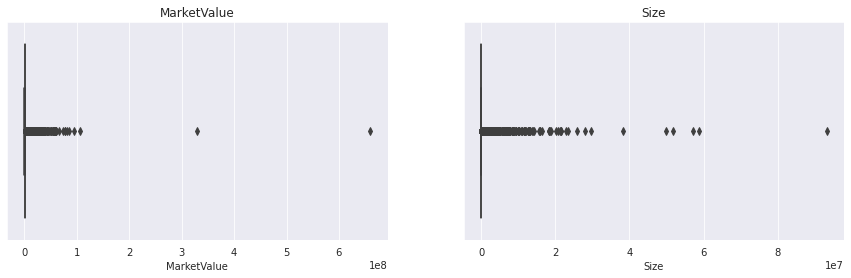

In [116]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

axes[0].set_title('MarketValue')
axes[1].set_title('Size')

sns.boxplot(x = df_clean['MarketValue'], ax = axes[0])
sns.boxplot(x = df_clean['Size'], ax = axes[1])
plt.show()

It is clear from the plot that values of market value greater than $\approx R 1.2x10^{6}$ are outliers. 

## <b> Outliers Removal: </b>

In the next cell, we remove the outliers we identified in the above table. We remove all properties with a market value less than R 27 500 and those greater than R $1.25x10^{6}$ (we concluded these were outliers above). We will proceed and  removed all properties with a size less than or equal to 73 squared meters since they are too small compared to the sizes of the other properties in the study and they are also far from the average property size in South Africa, standing at 146 $𝑚^{2}$ .
<br>

In [117]:
# removing outliers based on Size and Market Value
df_clean = df_clean[df_clean['Size'] > 73]        ##Exclude property with size < 73 m^2
df_clean = df_clean[df_clean['Size'] <= 1e3]       ##Exclude property with size > 1e3 m^2
df_clean = df_clean[df_clean['MarketValue'] < 1.25e6]

The box plot after removing outliers:


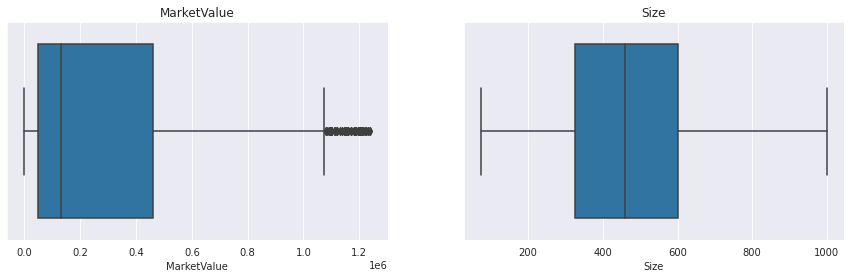

In [118]:
print('The box plot after removing outliers:')
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

axes[0].set_title('MarketValue')
axes[1].set_title('Size')

sns.boxplot(x = df_clean['MarketValue'], ax = axes[0])
sns.boxplot(x = df_clean['Size'], ax = axes[1])
plt.show()

The box plot above show the box plot after removal of outliers. It shows the distribution of market values that remains. The outliers now are no longer part of the distribution.

In [119]:
print("Table showing the data description of current state of the dataset after removal of outliers:")
df_clean.describe()

Table showing the data description of current state of the dataset after removal of outliers:


,Physical Addr,Size,MarketValue,Supp RollNo,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Val Cnt
count,34685.000000,34685.000000,3.468500e+04,34685.000000,34685.000000,34685.000000,34685.000000,34685.000000,34685.000000,34685.000000
mean,816.073980,464.519850,2.809887e+05,1.316736,9.563558,11.117688,1.846129,22.828917,20.071212,1.000375
std,327.235936,210.801164,2.974605e+05,0.897149,2.458473,5.621201,0.360830,44.399724,14.738197,0.023402
min,1.000000,74.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,615.000000,325.000000,5.000000e+04,1.000000,9.000000,9.000000,2.000000,17.000000,10.000000,1.000000
50%,1044.000000,459.000000,1.300000e+05,1.000000,9.000000,9.000000,2.000000,18.000000,20.000000,1.000000
75%,1117.000000,600.000000,4.600000e+05,1.000000,9.000000,9.000000,2.000000,28.000000,30.000000,1.000000
max,1139.000000,1000.000000,1.240000e+06,6.000000,33.000000,54.000000,2.000000,999.000000,60.000000,3.000000


The data description shown above refers to dataset without outliers. The problems we identified in the earlier have been rectified. The min value of both size and market value are now realistic. 

### <b> Identifying relationships between features: </b> <a class="tocSkip">

In the next cell, we make our predictive variable the first variable. Thus, the first column in the table makes it the focal point.

In [120]:
# rearranging features and marking market value the first column
df_clean = df_clean[['MarketValue'] + [col for col in df_clean.columns if col != 'MarketValue']]
df_clean.head(2)

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
9,390000.0,NELSPRUIT TOWN,JABULA TRUST,1,3,518.0,1.0,2009-07-01,2,2,2,14.0,3.0,MB0201,1.0
12,400000.0,NELSPRUIT TOWN,DRUMGOR INVESTMENTS CC C,1,4,357.0,4.0,2009-08-05,2,2,1,14.0,3.0,MB0201,1.0


In the next cell, we encode the rest of the categorical variables. We do this to see how they correlate with the other variables. Most importantly, we do this to see how they correlate with the market value variable.

In [121]:
df_copy2 = df_clean.copy()

dic = pd.Series(df_copy2['Township'].unique())
dic.index = dic.index + 1
dic = pd.Series(dic.index.values, index = dic)

dic2 = pd.Series(df_copy2['Owner Name'].unique())
dic2.index = dic2.index + 1
dic2 = pd.Series(dic2.index.values, index = dic2)

dic3 = pd.Series(df_copy2['Meter Book'].unique())
dic3.index = dic3.index + 1
dic3 = pd.Series(dic3.index.values, index = dic3)

dic4 = pd.Series(df_copy2['Effect Date'].unique())
dic4.index = dic4.index + 1
dic4 = pd.Series(dic4.index.values, index = dic4)

lookup_table = dict(dic)

def lookup_customer(val):
    return lookup_table.get(val, np.nan)


df_copy2['Township'] = df_copy2['Township'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic2)
df_copy2['Owner Name'] = df_copy2['Owner Name'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic3)
df_copy2['Meter Book'] = df_copy2['Meter Book'].apply(lambda x: lookup_customer(x));

lookup_table = dict(dic4)
df_copy2['Effect Date'] = df_copy2['Effect Date'].apply(lambda x: lookup_customer(x));

print("The dataset after encoding the remaining features:")
df_copy2.head()

The dataset after encoding the remaining features:


,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
9,390000.0,1,1,1,3,518.0,1.0,1,2,2,2,14.0,3.0,1,1.0
12,400000.0,1,2,1,4,357.0,4.0,2,2,2,1,14.0,3.0,1,1.0
18,830000.0,1,3,1,1,496.0,1.0,1,1,1,2,14.0,3.0,2,1.0
27,980000.0,1,4,1,4,744.0,1.0,1,2,2,2,14.0,3.0,1,1.0
58,1.0,1,5,1,7,744.0,4.0,2,1,1,1,14.0,3.0,3,1.0


The above shows that all the variables now have been encoded accordingly. Now that all the features have
been encoded now we are ready to plot our correlation plots.

## <b> Correlation plots: </b> 

#### Correlation matrix:

In [122]:
# calculating the correlation matrix
df_copy2 = df_copy2.astype('float64')
corr = df_copy2.corr()
corr

,MarketValue,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,Valuation Type,Ward,Cycle,Meter Book,Val Cnt
MarketValue,1.000000,-0.051776,0.037968,-0.283689,-0.462673,-0.018259,0.300922,0.248342,0.159697,-0.103832,-0.306176,-0.067204,-0.320759,-0.480602,0.010430
Township,-0.051776,1.000000,0.632911,-0.163211,0.411587,-0.238168,-0.074109,-0.057224,-0.079153,0.075906,0.067169,0.012176,0.072401,0.370391,-0.012553
Owner Name,0.037968,0.632911,1.000000,-0.271969,0.309325,-0.164936,-0.021246,-0.005791,-0.060904,-0.265346,0.011298,-0.052082,0.034923,0.305914,-0.014948
Prop Category,-0.283689,-0.163211,-0.271969,1.000000,-0.047686,0.055226,-0.076899,-0.096513,-0.017654,0.200290,0.103854,0.012470,0.149641,-0.046120,-0.008458
Physical Addr,-0.462673,0.411587,0.309325,-0.047686,1.000000,0.186665,-0.284266,-0.208313,-0.122392,0.149650,0.266998,0.055484,0.322966,0.856273,-0.011878
Size,-0.018259,-0.238168,-0.164936,0.055226,0.186665,1.000000,-0.098214,-0.046432,-0.085063,0.071367,0.069409,0.029082,0.101049,0.253695,0.008067
Supp RollNo,0.300922,-0.074109,-0.021246,-0.076899,-0.284266,-0.098214,1.000000,0.585764,0.111971,-0.017105,-0.827904,-0.040042,-0.172616,-0.279600,0.027304
Effect Date,0.248342,-0.057224,-0.005791,-0.096513,-0.208313,-0.046432,0.585764,1.000000,0.116242,-0.026346,-0.927694,-0.037862,-0.208197,-0.244091,0.015353
Zone Code,0.159697,-0.079153,-0.060904,-0.017654,-0.122392,-0.085063,0.111971,0.116242,1.000000,0.466971,-0.122443,-0.025213,-0.065285,-0.194011,-0.003170
Usage Code,-0.103832,0.075906,-0.265346,0.200290,0.149650,0.071367,-0.017105,-0.026346,0.466971,1.000000,0.028786,0.192766,-0.050571,0.158923,-0.005157


#### Heat map: 

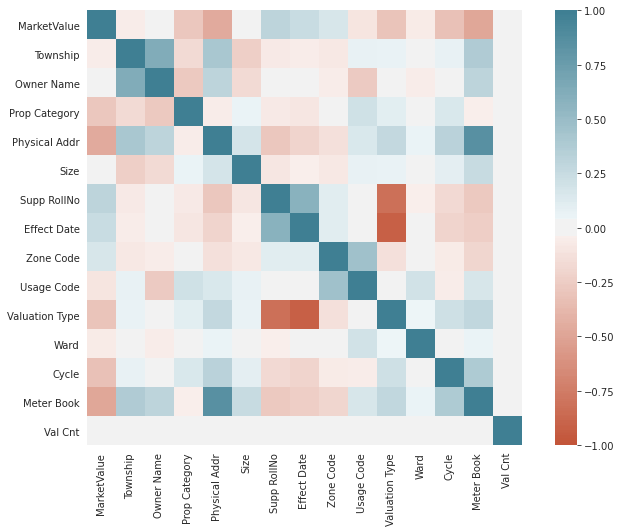

In [123]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)
plt.show()

####  Scatter plots:

In the next cells, we jitter encoded variables for better data visualization.

In [124]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [125]:
df_copy2['Physical Addr'] = Jitter(df_copy2['Physical Addr'])
df_copy2['Valuation Type'] = Jitter(df_copy2['Valuation Type'])
df_copy2['Usage Code'] = Jitter(df_copy2['Usage Code'])
df_copy2['Township'] = Jitter(df_copy2['Township'])
df_copy2['Owner Name'] = Jitter(df_copy2['Owner Name'])
df_copy2['Effect Date'] = Jitter(df_copy2['Effect Date'])
df_copy2['Meter Book'] = Jitter(df_copy2['Meter Book'])

Scatter plots:


<Figure size 86400x86400 with 0 Axes>

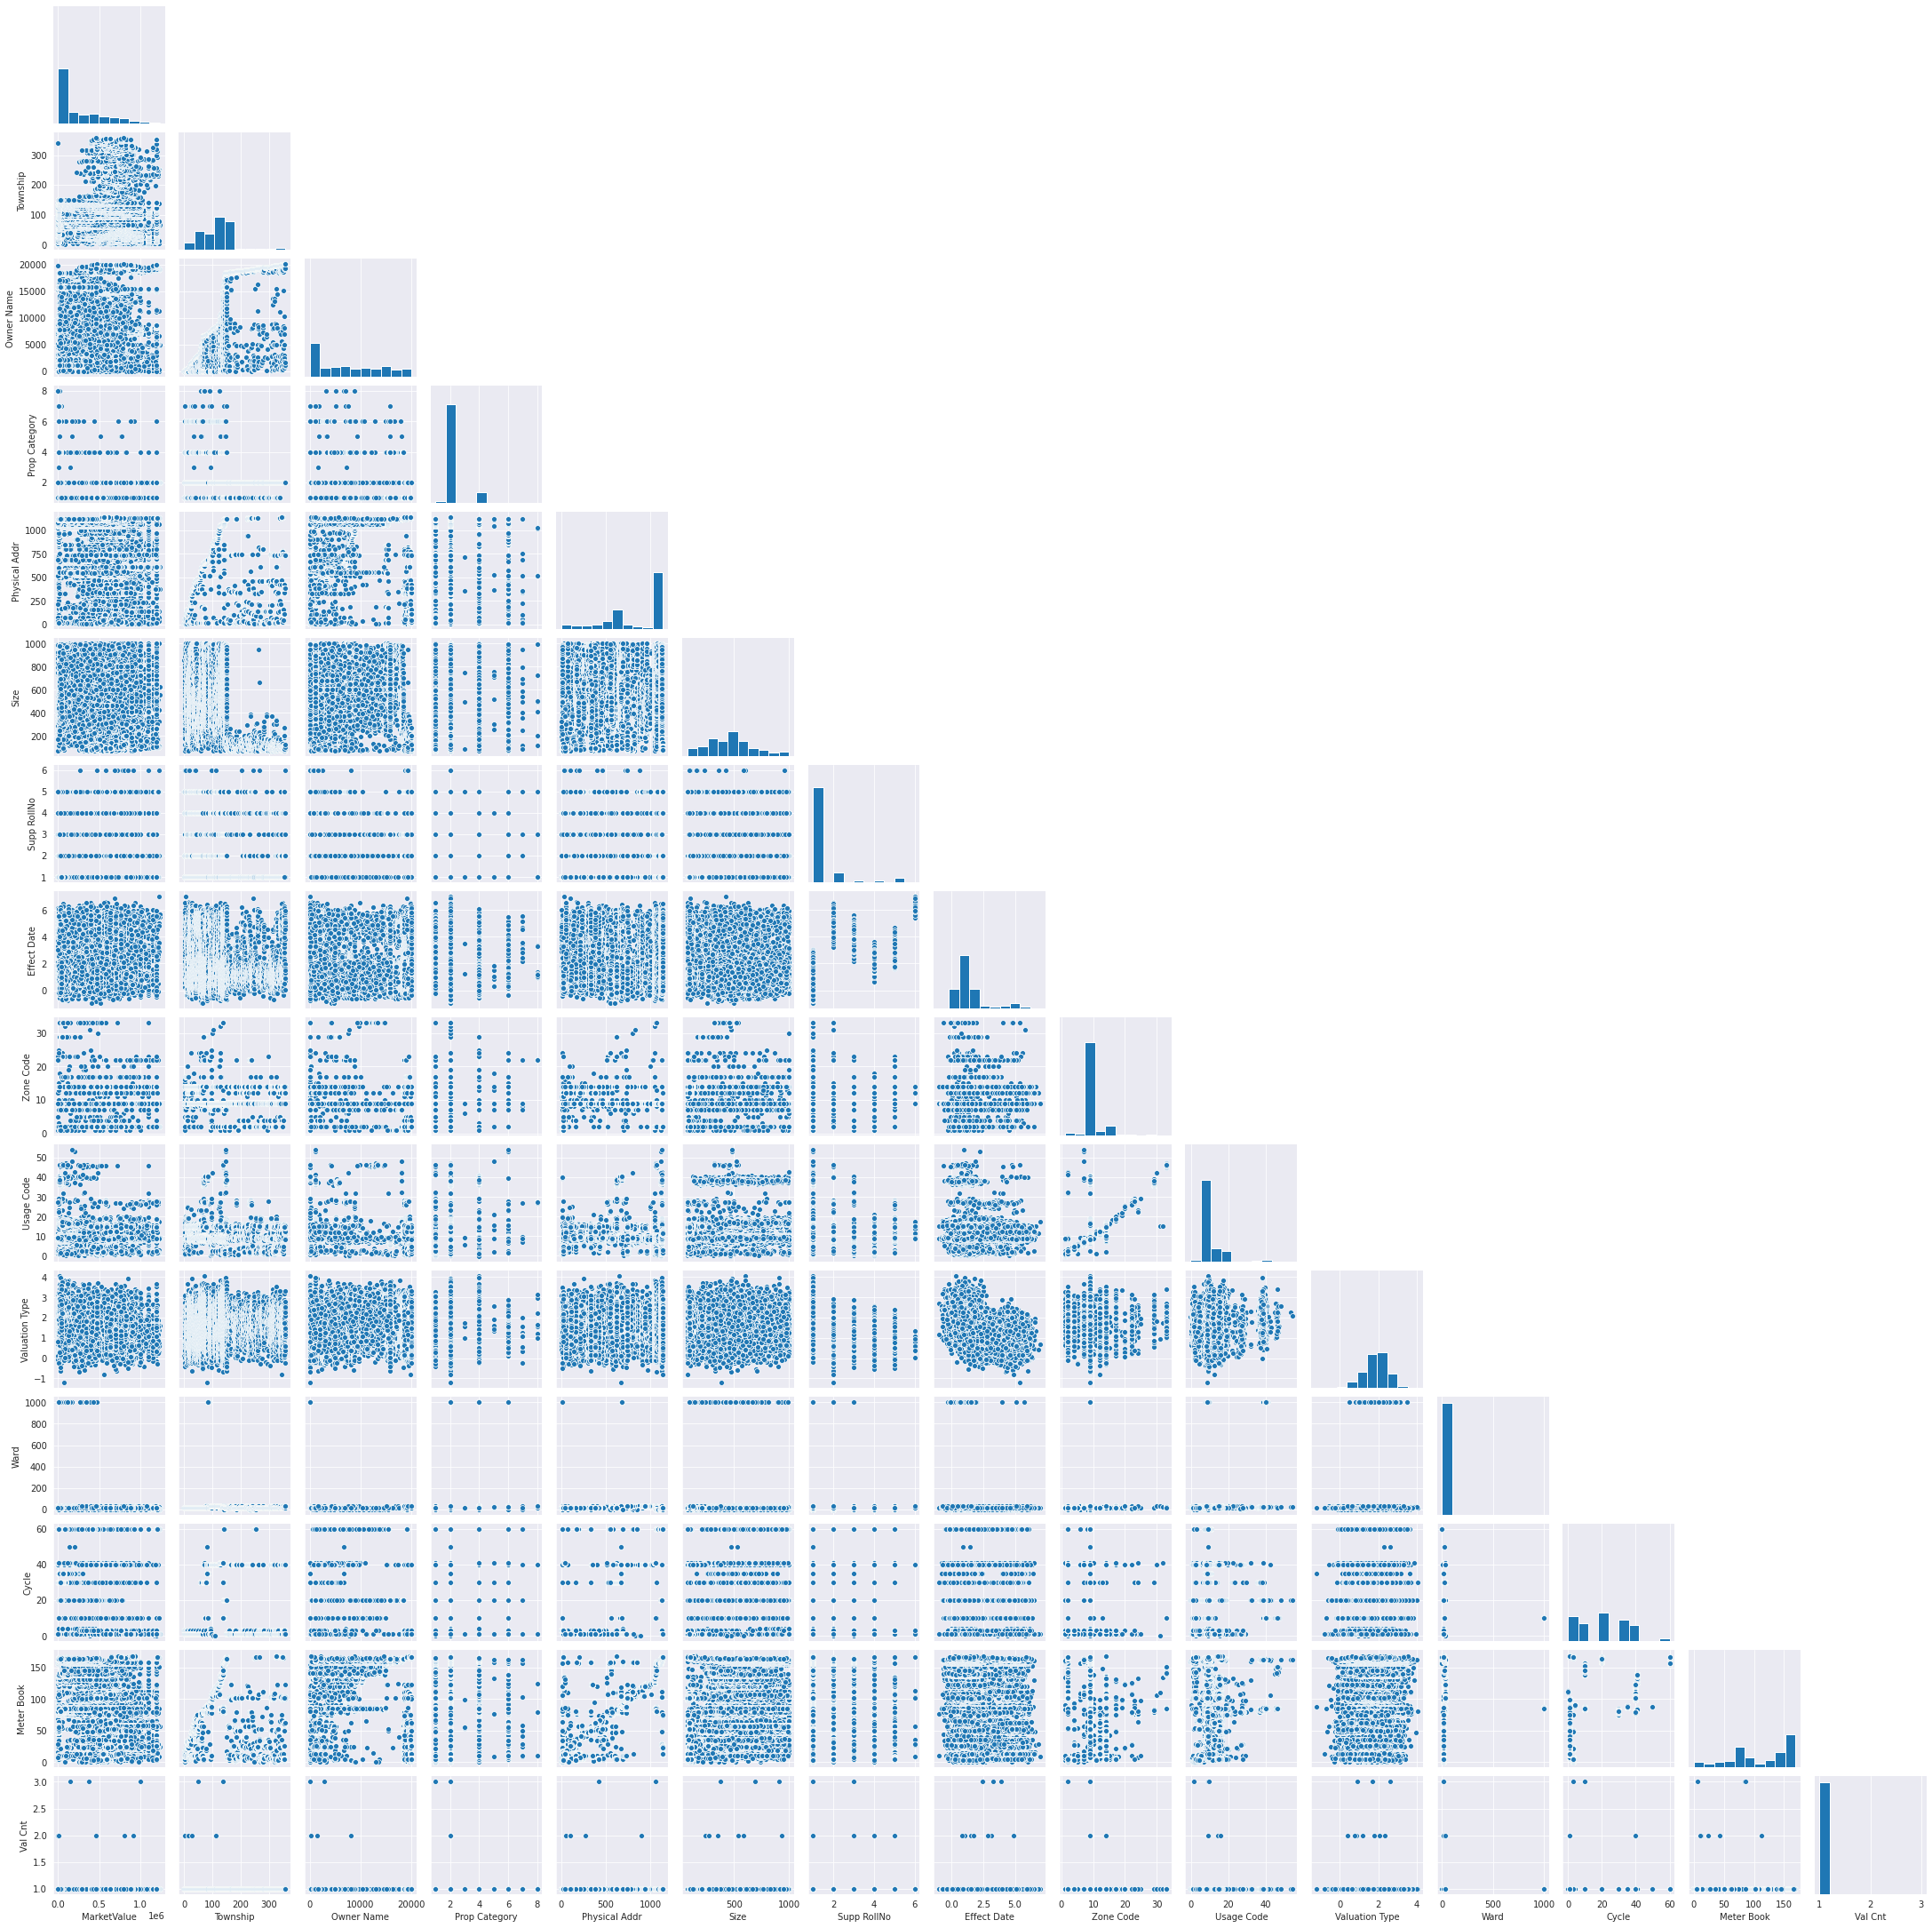

In [126]:
print("Scatter plots:")
plt.figure(figsize=(1200, 1200))
mat_plot = sns.pairplot(df_copy2,diag_kind="hist",palette='Dark2',corner=True, height = 2)
plt.show()

<a id="plots"></a>
### <b> Key points from the correlation matrix, heat map and scatter plots: </b> <a class="tocSkip">
- Our predictive variable(Market Value) has very little to non correlation with some of our deterministic variables.
- The Supp RollNo, Effect Date,  Zone Code, Usage Code, and Val Count are the only features that are positively correlated to the market value.
- Usage Code is the most positively correlated feature to market value. 
- The remaining features were all negatively correlated to market value. The Ward feature was the most negatively correlated to the market value. 
- Some of the features are strongly correlated, for example, there is a strong positive correlation between Owner Name and Township. 
- These variables are likely to cause us trouble when we fit our linear regression model later on. 
- We are going to into account these kinds of relationships in the next section when we fit our linear regression model.


## <b> Conclusion: </b>
<p>
In this section, we explored the dataset by identifying its contents and attributes. We identified outliers and remove data points containing these outliers. We then investigated relationships among features. We saw some of the deterministic features were highly correlated. We plan to rectify this in the sections below. Now that we are done with our data wrangling and exploration analysis, we are in a
good position to build our linear model.
</p>
<br>

<a id='Data_Splitting'></a>

# <b> Data Splitting: </b>

In this section, we split our dataset into training and testing sets. We use a 67 / 33 (train / test) split. We will use the training set for modelling learning purposes and the test set will be used for validation purposes. To be more specific, the test set will help us check if our models overfit or underfit the training data set.

In [127]:
#Split the data into Train, and Test
df = df_copy2.copy()
df.head()
X = df.loc[:, df.columns != 'MarketValue']
y = df.loc[:, 'MarketValue']

#Split the data into Train, and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
##Add constant(or bias) to the dataset
X_train = sm.add_constant(X_train)

In [128]:
print('Size of the training data is: ', len(y_train))
print('Size of the test data is:', len(y_test))

Size of the training data is:  23238
Size of the test data is: 11447


<br>
</br>
<blockqoute>In the next few sections, we are going to try and fit a linear regression model that will capture the relationship between the marketValue and Township, Owner Name, Prop Category, Physical Addr, Size, Supp RollNo, Effect Date, Zone Code, Usage Code, Valuation Type, Ward, Cycle, Meter Book and Val Cnt.
We expect our linear regression model to take this form : $$ Y= B_{1}x_{1} +B_{2}x_{2}+ ... $$ where $B_{i}\  $ for  i = {1,2,3, ...} are the weights associated with the respective regressors and Y is our target variable, the market value. 
</blockqoute>


<a id='models'></a>

# <b> Models: </b>

In this section, we fit our model using linear regression and analyze its performance. The model fitting will be based on R-squared. Since we want to know how much our independent variables influence our dependent (Market Value), the R-squared measure is perfect for our modeling.

Below we fit our initial models and evaluate their respective performances.

## **Initial models:**

### **Model 1: unmodified inputs:**
In this next cell, we fit our model on the original training data.

In [129]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1169.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:09:10   Log-Likelihood:            -3.1955e+05
No. Observations:               23238   AIC:                         6.391e+05
Df Residuals:                   23223   BIC:                         6.392e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            5.33e+05   6.01e+04      8.

From the above model, we have an R-squared value of $ \approx 0.414$. The model also has multicollinearity
between some of the variables, hence it produced a high condition number. This is consistent with our findings from the data exploration section.

### <b> Data transformation: </b> <a class="tocSkip">
In this section, we transform our input data to have a polynomial degree of two and three. We are then
going to fit two models on these two different datasets.

#### <b> Fixing the data to have a polynomial linear regression of degree 2:</b> <a class="tocSkip">
In this next cell, we transform the data to have a polynomial degree of 2.

In [130]:
X_trained_square = X_train.loc[:,X_train.columns !='const'] * X_train.loc[:,X_train.columns !='const']
X_trained_square = X_trained_square.rename(columns = {'Township': 'Township_sqr', 'Owner Name': 'Owner Name_sqr', 'Prop Category': 'Prop Category_sqr', 'Physical Addr': 'Physical Addr_sqr', 'Size':'Size_sqr', 'Supp RollNo':'Supp RollNo_sqr','Effect Date':'Effect Date_sqr', 'Zone Code':'Zone Code_sqr', 'Usage Code':'Usage Code_sqr','Valuation Type':'Valuation Type_sqr', 'Ward':'Ward_sqr', 'Cycle':'Cycle_sqr', 'Meter Book':'Meter Book_sqr', 'Val Cnt':'Val Cnt_sqr'}, inplace = False)
X_test_square = X_test.loc[:,X_test.columns !='const'] * X_test.loc[:,X_test.columns !='const']
X_test_square = X_test_square.rename(columns = {'Township': 'Township_sqr', 'Owner Name': 'Owner Name_sqr', 'Prop Category': 'Prop Category_sqr', 'Physical Addr': 'Physical Addr_sqr', 'Size':'Size_sqr', 'Supp RollNo':'Supp RollNo_sqr','Effect Date':'Effect Date_sqr', 'Zone Code':'Zone Code_sqr', 'Usage Code':'Usage Code_sqr','Valuation Type':'Valuation Type_sqr', 'Ward':'Ward_sqr', 'Cycle':'Cycle_sqr', 'Meter Book':'Meter Book_sqr', 'Val Cnt':'Val Cnt_sqr'}, inplace = False)
X_trained_square.head(2)

,Township_sqr,Owner Name_sqr,Prop Category_sqr,Physical Addr_sqr,Size_sqr,Supp RollNo_sqr,Effect Date_sqr,Zone Code_sqr,Usage Code_sqr,Valuation Type_sqr,Ward_sqr,Cycle_sqr,Meter Book_sqr,Val Cnt_sqr
46272,20656.461028,3.025302e+08,4.0,1.249702e+06,360000.0,1.0,0.329756,81.0,81.198720,4.460144,729.0,400.0,25746.908960,1.0
15719,5156.695655,4.331989e+01,16.0,4.261936e+05,90000.0,1.0,0.232639,81.0,81.496185,5.146073,324.0,900.0,6303.664294,1.0


#### <b> Fixing the data to have a polynomial linear regression of degree 3:</b> <a class="tocSkip">
In this next cell, we transform the data to have a polynomial degree of 3.

In [131]:
X_trained_cube = X_train.loc[:,X_train.columns !='const'] * X_train.loc[:,X_train.columns !='const'] * X_train.loc[:,X_train.columns !='const']
X_trained_cube = X_trained_cube.rename(columns = {'Township': 'Township_cb', 'Owner Name': 'Owner Name_cb', 'Prop Category': 'Prop Category_cb', 'Physical Addr': 'Physical Addr_cb', 'Size':'Size_cb', 'Supp RollNo':'Supp RollNo_cb','Effect Date':'Effect Date_cb', 'Zone Code':'Zone Code_cb', 'Usage Code':'Usage Code_cb','Valuation Type':'Valuation Type_cb', 'Ward':'Ward_cb', 'Cycle':'Cycle_cb', 'Meter Book':'Meter Book_cb', 'Val Cnt':'Val Cnt_cb'}, inplace = False)
X_trained_cube.head(2)

,Township_cb,Owner Name_cb,Prop Category_cb,Physical Addr_cb,Size_cb,Supp RollNo_cb,Effect Date_cb,Zone Code_cb,Usage Code_cb,Valuation Type_cb,Ward_cb,Cycle_cb,Meter Book_cb,Val Cnt_cb
46272,2.968820e+06,5.262027e+12,8.0,1.397042e+09,216000000.0,1.0,0.189360,729.0,731.684358,9.419402,19683.0,8000.0,4.131309e+06,1.0
15719,3.703030e+05,2.851222e+02,64.0,2.782342e+08,27000000.0,1.0,0.112208,729.0,735.708742,11.673846,5832.0,27000.0,5.004833e+05,1.0


####  **Complete training data for polynomial of degree 2:** <a class="tocSkip">
In this next cell, we join our original data with the training input data with a polynomial degree of 2.


In [132]:
data_list = [X_train, X_trained_square]

X_train_sqr = pd.concat(data_list, axis=1)
X_train_sqr.head(2)

,const,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,...,Size_sqr,Supp RollNo_sqr,Effect Date_sqr,Zone Code_sqr,Usage Code_sqr,Valuation Type_sqr,Ward_sqr,Cycle_sqr,Meter Book_sqr,Val Cnt_sqr
46272,1.0,143.723558,17393.394402,2.0,1117.900528,600.0,1.0,0.574244,9.0,9.011033,...,360000.0,1.0,0.329756,81.0,81.198720,4.460144,729.0,400.0,25746.908960,1.0
15719,1.0,71.810136,6.581785,4.0,652.835079,300.0,1.0,0.482327,9.0,9.027524,...,90000.0,1.0,0.232639,81.0,81.496185,5.146073,324.0,900.0,6303.664294,1.0


#### <b> Complete training data for polynomial of degree 3: <b> <a class="tocSkip">
In this next cell, we join our original training data with the training input data with a polynomial degree of 2 and with the training input data with a polynomial degree of 3.

In [133]:
data_list = [X_train, X_trained_square,X_trained_cube]

X_train_cb = pd.concat(data_list, axis=1)
X_train_cb.head(2)

,const,Township,Owner Name,Prop Category,Physical Addr,Size,Supp RollNo,Effect Date,Zone Code,Usage Code,...,Size_cb,Supp RollNo_cb,Effect Date_cb,Zone Code_cb,Usage Code_cb,Valuation Type_cb,Ward_cb,Cycle_cb,Meter Book_cb,Val Cnt_cb
46272,1.0,143.723558,17393.394402,2.0,1117.900528,600.0,1.0,0.574244,9.0,9.011033,...,216000000.0,1.0,0.189360,729.0,731.684358,9.419402,19683.0,8000.0,4.131309e+06,1.0
15719,1.0,71.810136,6.581785,4.0,652.835079,300.0,1.0,0.482327,9.0,9.027524,...,27000000.0,1.0,0.112208,729.0,735.708742,11.673846,5832.0,27000.0,5.004833e+05,1.0


### **Model 2: Polynomial linear regression model - polynomial of degree 2**
In this section, we fit our model one data with a degree of one and two.

In [134]:
model = sm.OLS(y_train, X_train_sqr)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     881.9
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:09:21   Log-Likelihood:            -3.1733e+05
No. Observations:               23238   AIC:                         6.347e+05
Df Residuals:                   23209   BIC:                         6.349e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.468e+04   3.78

From the above model, we have an R-squared value of $\approx 0.515$. The model also has multicollinearity between some of the variables, hence it produced a high condition number.

### **Model 3 : Polynomial linear regression model - polynomial of degree 3**

In [135]:
model = sm.OLS(y_train, X_train_cb)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     727.1
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:09:24   Log-Likelihood:            -3.1647e+05
No. Observations:               23238   AIC:                         6.330e+05
Df Residuals:                   23198   BIC:                         6.333e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1966.1513   1.24

From the above model, we have an R-squared value of $\approx 0.55$. The model also has multicollinearity between some of the variables, hence it produced a high condition number.

### ***Discussion of the initial models:***

From the above models,  the polynomial linear regression model with a polynomial of degree 2 has the highest R-squared value, followed by the polynomial linear regression model with a polynomial of degree 3 than the linear regression model. We will continue and optimized all the models and see which one will be the best. Since our model selection is based on R-squared the best model will be the one with the highest R-squared value.

### <b> Optimizing the regression model: </b>
We use different methods to optimize our regression method, intending to improve our model's performance by:
1. Using Variance Inflation Factors(VIF) to remove features causing multicollinearity.
2. Forward-Backwards feature selection to add significant features.
 3. Forward Selection to fit the optimal model.

## **Feature Selection:**

### **Using VIF to remove features:** <a class="tocSkip">

Below, we investigate the Variance inflation factor (VIF) to measure the amount of multicollinearity in the features. We will use the function in the below cell to calculate VIF and remove features that have a VIF value greater than our threshold of 5.0. We will apply this function to the different three datasets we produced above for training purposes. The first data set contains the original training dataset and the remaining datasets are the transformed forms of the original training dataset.

In [136]:
#Function to calculate vif
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

##### **VIF applied for normal linear regression:**
In this next cell, we apply the VIF function to the original training set.

In [137]:
X_train = calculate_vif_(X_train)

dropping 'const' at index: 0
dropping 'Val Cnt' at index: 13
dropping 'Physical Addr' at index: 3
dropping 'Zone Code' at index: 6
dropping 'Prop Category' at index: 2
dropping 'Meter Book' at index: 9
dropping 'Township' at index: 0
dropping 'Valuation Type' at index: 5
Remaining variables:
Index(['Owner Name', 'Size', 'Supp RollNo', 'Effect Date', 'Usage Code',
       'Ward', 'Cycle'],
      dtype='object')


##### **VIF applied for polynomial Linear regression of degree 2:**
In this next cell, we apply the VIF function to the training set with linear features and features with a polynomial degree of 2.

In [138]:
X_train_sqr = calculate_vif_(X_train_sqr)

dropping 'const' at index: 0
dropping 'Val Cnt' at index: 13
dropping 'Meter Book' at index: 12
dropping 'Zone Code' at index: 7
dropping 'Prop Category' at index: 2
dropping 'Physical Addr' at index: 2
dropping 'Supp RollNo' at index: 3
dropping 'Valuation Type' at index: 5
dropping 'Township' at index: 0
dropping 'Size' at index: 1
dropping 'Ward' at index: 3
dropping 'Usage Code' at index: 2
dropping 'Owner Name' at index: 0
dropping 'Cycle' at index: 1
dropping 'Effect Date' at index: 0
dropping 'Val Cnt_sqr' at index: 13
dropping 'Physical Addr_sqr' at index: 3
Remaining variables:
Index(['Township_sqr', 'Owner Name_sqr', 'Prop Category_sqr', 'Size_sqr',
       'Supp RollNo_sqr', 'Effect Date_sqr', 'Zone Code_sqr', 'Usage Code_sqr',
       'Valuation Type_sqr', 'Ward_sqr', 'Cycle_sqr', 'Meter Book_sqr'],
      dtype='object')


##### **VIF applied for polynomial Linear regression of degree 3:**
In this next cell, we apply the VIF function to the training set with linear features and features with a polynomial degree of 2.

In [139]:
X_train_cb = calculate_vif_(X_train_cb)

dropping 'Val Cnt_sqr' at index: 28
dropping 'Ward_sqr' at index: 25
dropping 'Supp RollNo_sqr' at index: 20
dropping 'Physical Addr_sqr' at index: 18
dropping 'Meter Book_sqr' at index: 24
dropping 'Usage Code_sqr' at index: 21
dropping 'Township_sqr' at index: 15
dropping 'Size_sqr' at index: 17
dropping 'Prop Category_sqr' at index: 16
dropping 'Cycle_sqr' at index: 19
dropping 'Owner Name_sqr' at index: 15
dropping 'Effect Date_sqr' at index: 15
dropping 'Valuation Type_sqr' at index: 16
dropping 'Zone Code_sqr' at index: 15
dropping 'Ward' at index: 11
dropping 'Meter Book' at index: 12
dropping 'Supp RollNo' at index: 6
dropping 'Val Cnt_cb' at index: 25
dropping 'Physical Addr_cb' at index: 15
dropping 'Usage Code' at index: 8
dropping 'Township' at index: 1
dropping 'Owner Name_cb' at index: 11
dropping 'const' at index: 0
dropping 'Val Cnt' at index: 8
dropping 'Prop Category' at index: 1
dropping 'Valuation Type' at index: 5
dropping 'Size' at index: 2
dropping 'Physical Addr

<br></br>
Our stepwise function is where most of the features will be selected. We will use the p-values to determine if a variable should be added to our model. If the p-value is less than 5% we discard the feature.

Hypothesis testing on the features:

On each feature, we are testing whether the feature has no impact on the market value $H_{0}: B_{1}= B_{2} = ... = B_{n} = 0$ 

Our error term is 5% (0.05).

The t-stat we will receive will be used to calculate the p-value, for each feature. If the p-value is less than our error term which is 0.05 we will reject the null hypothesis and therefore will add the feature into our model since the null hypothesis says that it does not have an influence on the market value is rejected. If we get any value with a p-value higher than 0.05, we will fail to reject the null hypothesis thus there is a chance that the feature does not have an influence on market value thus we discard it from our model.
<br></br>

#### **Forward stepwise selection:**
In this next cell, we present our forward stepwise feature selection function.

In [140]:
def stepwise_selection_forward(X, y, 
                       initial_list=[], 
                       threshold_in=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        
        if not changed:
            break

        
    return included

Since the p-value of the features is influenced by other feature in the model, we have to do Backwards stepwise selection to discard those feature that has changed p-value such that the new p-value is greater than 0.05 and thus falls outside our rejection region of the null hypothesis.

#### **Backwards stepwise selection:** <a class="tocSkip">
In the next cell, we present our backward stepwise feature selection function.

In [141]:
def stepwise_selection_backwards(X, y, 
                       initial_list=[],
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included=list(initial_list)

    while True:
        changed=False
        # backward step
        model = sm.OLS(y, X[included]).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
        
    return included


#### **Putting data through the stepwise selection process:** <a class="tocSkip">
In this section, we will put our three training sets through the stepwise selection processes. We show which feature we will include in each model of the three models and which feature we will remove. 

##### **For normal Linear regression:**


In [142]:
remaining_var = stepwise_selection_forward(X_train.loc[:, X_train.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var = stepwise_selection_backwards(X_train.loc[:, X_train.columns], y_train, remaining_var)

Add  Owner Name                     with p-value 0.0
Add  Effect Date                    with p-value 0.0
Add  Size                           with p-value 0.0
Add  Supp RollNo                    with p-value 0.0
Add  Cycle                          with p-value 1.55399e-244
Add  Usage Code                     with p-value 6.00117e-07
Add  Ward                           with p-value 8.13107e-05


##### **For polynomial linear regression of degree 2:**


In [143]:
remaining_var_two = stepwise_selection_forward(X_train_sqr.loc[:, X_train_sqr.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var_two = stepwise_selection_backwards(X_train_sqr.loc[:, X_train_sqr.columns], y_train, remaining_var_two)

Add  Prop Category_sqr              with p-value 0.0
Add  Township_sqr                   with p-value 0.0
Add  Supp RollNo_sqr                with p-value 0.0
Add  Valuation Type_sqr             with p-value 0.0
Add  Zone Code_sqr                  with p-value 0.0
Add  Size_sqr                       with p-value 0.0
Add  Meter Book_sqr                 with p-value 0.0
Add  Effect Date_sqr                with p-value 3.6728e-182
Add  Usage Code_sqr                 with p-value 2.29138e-46
Add  Owner Name_sqr                 with p-value 2.16751e-15


##### **For polynomial Linear regression of degree 3:**


In [144]:
remaining_var_three = stepwise_selection_forward(X_train_cb.loc[:, X_train_cb.columns], y_train) #Need to exclude const because it is also added inside the fuctions
remaining_var_three = stepwise_selection_backwards(X_train_cb.loc[:, X_train_cb.columns], y_train, remaining_var_three)

Add  Owner Name                     with p-value 0.0
Add  Supp RollNo_cb                 with p-value 0.0
Add  Valuation Type_cb              with p-value 0.0
Add  Effect Date_cb                 with p-value 0.0
Add  Size_cb                        with p-value 0.0
Add  Meter Book_cb                  with p-value 0.0
Add  Township_cb                    with p-value 7.24086e-167
Add  Zone Code_cb                   with p-value 8.37026e-72
Add  Prop Category_cb               with p-value 3.89544e-63
Add  Cycle_cb                       with p-value 5.71008e-13


#### **Presenting the new models with the constants as part of our models:** <a class="tocSkip">

<a id="linreg"></a>
##### **For normal Linear regression:**


In [145]:
##The we make our new predictions.
#Append the bias term into the X data
X_train = sm.add_constant(X_train[remaining_var])
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     746.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:12:58   Log-Likelihood:            -3.2339e+05
No. Observations:               23238   AIC:                         6.468e+05
Df Residuals:                   23230   BIC:                         6.469e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.031e+05   7820.232     38.760      0.000    2.88e+05    3.18e+05
Owner Name      1.3720      0.291      4.714      0.000       0.802       1.942
Effect Date  1.172e+04   1623.169      7.218      0.000    8534.106    1.49e+04
Size           63.3548      8.510      7.445      0.000      46.675      80.034
Supp RollNo  7.442e+04   2338.237     31.828      0.000    6.98e+04     7.9e+04
Cycle       -5710.6255    122.775    -46.513      0.000   -5951.273   -5469.978
Usage Code  -5292.2622    335.171    -15.790      0.000   -5949.220   -4635.304
Ward         -232.6459     42.084     -5.528      0.000    -315.133    -150.159
==============================================================================
Omnibus:                     3922.069   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6341.121
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       4.069   Cond. No.                     4.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **For polynomial Linear regression of degree 2:**


In [146]:
##The we make our new predictions.
#Append the bias term into the X data
X_train_sqr = sm.add_constant(X_train_sqr[remaining_var_two])
model = sm.OLS(y_train, X_train_sqr)
result_one = model.fit()
result_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     1430.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:13:01   Log-Likelihood:            -3.2017e+05
No. Observations:               23238   AIC:                         6.404e+05
Df Residuals:                   23227   BIC:                         6.405e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.267e+05   6377.069     66.909      0.000    4.14e+05    4.39e+05
Prop Category_sqr  -1.917e+04    383.741    -49.951      0.000   -1.99e+04   -1.84e+04
Township_sqr           2.2742      0.108     20.991      0.000       2.062       2.487
Supp RollNo_sqr     8685.2189    340.515     25.506      0.000    8017.788    9352.650
Valuation Type_sqr  -586.5562    786.976     -0.745      0.456   -2129.081     955.969
Zone Code_sqr         94.3698     25.565      3.691      0.000      44.260     144.480
Size_sqr               0.2710      0.007     37.684      0.000       0.257       0.285
Meter Book_sqr       -15.4557      0.192    -80.360      0.000     -15.833     -15.079
Effect Date_sqr     2005.6310    242.311      8.277      0.000    1530.686    2480.576
Usage Code_sqr        30.6932      8.278      3.708      0.000      14.467      46.919
Owner Name_sqr         0.0002   1.87e-05     10.500      0.000       0.000       0.000
==============================================================================
Omnibus:                     2973.034   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4490.292
Skew:                           0.933   Prob(JB):                         0.00
Kurtosis:                       4.075   Cond. No.                     6.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **For polynomial Linear regression of degree 3:**


In [147]:
##The we make our new predictions.
#Append the bias term into the X data
X_train_cb = sm.add_constant(X_train_cb[remaining_var_three])
model = sm.OLS(y_train, X_train_cb)
result_two = model.fit()
result_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     1293.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:13:02   Log-Likelihood:            -3.2060e+05
No. Observations:               23238   AIC:                         6.412e+05
Df Residuals:                   23227   BIC:                         6.413e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               3.53e+05   4409.857     80.040      0.000    3.44e+05    3.62e+05
Owner Name            4.4014      0.303     14.511      0.000       3.807       4.996
Supp RollNo_cb     1877.7025     65.959     28.468      0.000    1748.418    2006.987
Valuation Type_cb  -301.9590    244.450     -1.235      0.217    -781.096     177.178
Effect Date_cb      582.6427     44.029     13.233      0.000     496.342     668.943
Size_cb               0.0003   7.64e-06     37.451      0.000       0.000       0.000
Meter Book_cb        -0.0790      0.001    -75.408      0.000      -0.081      -0.077
Township_cb           0.0075      0.000     25.902      0.000       0.007       0.008
Zone Code_cb          1.0619      0.782      1.358      0.174      -0.470       2.594
Prop Category_cb  -3072.7685     68.750    -44.695      0.000   -3207.524   -2938.013
Cycle_cb              0.0152      0.043      0.356      0.722      -0.068       0.099
==============================================================================
Omnibus:                     3050.493   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4617.150
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       4.063   Cond. No.                     7.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
y_predicted_list_test = []
for i in range(0, len(X_test)):
    x_values = np.array(list(X_test.iloc[i, 0:6]))[..., None]
    y_predicted = predict_y_value(coefficients_list, x_values)[0]
    y_predicted_list_test.append(y_predicted)

NameError: name 'predict_y_value' is not defined

#### **Presenting the new models without the constants in our models:** <a class="tocSkip">


##### **For normal linear regression:**

In [155]:
# Use VIF to remove the features and check perfomance
X_train = calculate_vif_(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

Remaining variables:
Index(['Owner Name', 'Effect Date', 'Size', 'Supp RollNo', 'Cycle',
       'Usage Code', 'Ward'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.541
Model:                            OLS   Adj. R-squared (uncentered):              0.541
Method:                 Least Squares   F-statistic:                              3911.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:34:21   Log-Likelihood:                     -3.2412e+05
No. Observations:               23238   AIC:                                  6.482e+05
Df Residuals:                   23231   BIC:                                  6.483e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Owner Name      6.9526      0.261     26.641      0.000       6.441       7.464
Effect Date  2.044e+04   1658.611     12.324      0.000    1.72e+04    2.37e+04
Size          238.7883      7.435     32.116      0.000     224.215     253.362
Supp RollNo  1.032e+05   2287.850     45.103      0.000    9.87e+04    1.08e+05
Cycle       -4040.4487    118.622    -34.062      0.000   -4272.955   -3807.942
Usage Code   1692.6261    291.592      5.805      0.000    1121.086    2264.166
Ward         -171.0148     43.392     -3.941      0.000    -256.065     -85.965
==============================================================================
Omnibus:                     2996.337   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4324.725
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                       3.760   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="linreg2"></a>
##### **For polynomial linear regression of degree 2:**


In [150]:
# Use VIF to remove the features and check perfomance
X_train_sqr = calculate_vif_(X_train_sqr)
model = sm.OLS(y_train, X_train_sqr)
result_one = model.fit()
result_one.summary()

dropping 'const' at index: 0
Remaining variables:
Index(['Prop Category_sqr', 'Township_sqr', 'Supp RollNo_sqr',
       'Valuation Type_sqr', 'Zone Code_sqr', 'Size_sqr', 'Meter Book_sqr',
       'Effect Date_sqr', 'Usage Code_sqr', 'Owner Name_sqr'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              3635.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:13:09   Log-Likelihood:                     -3.2222e+05
No. Observations:               23238   AIC:                                  6.445e+05
Df Residuals:                   23228   BIC:                                  6.445e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prop Category_sqr  -8201.2245    378.932    -21.643      0.000   -8943.957   -7458.492
Township_sqr           3.9337      0.115     34.153      0.000       3.708       4.159
Supp RollNo_sqr     1.535e+04    355.618     43.161      0.000    1.47e+04     1.6e+04
Valuation Type_sqr  2.825e+04    719.140     39.281      0.000    2.68e+04    2.97e+04
Zone Code_sqr        885.7217     24.753     35.783      0.000     837.205     934.238
Size_sqr               0.4201      0.007     56.276      0.000       0.405       0.435
Meter Book_sqr        -9.9450      0.190    -52.394      0.000     -10.317      -9.573
Effect Date_sqr     6978.6522    251.873     27.707      0.000    6484.965    7472.339
Usage Code_sqr       -96.4115      8.799    -10.957      0.000    -113.659     -79.164
Owner Name_sqr         0.0002   2.04e-05      7.937      0.000       0.000       0.000
==============================================================================
Omnibus:                     2234.880   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3169.090
Skew:                           0.765   Prob(JB):                         0.00
Kurtosis:                       3.966   Cond. No.                     6.82e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **For polynomial Linear regression of degree 3:**

In [151]:
# Use VIF to remove the features and check perfomance
X_train_cb = calculate_vif_(X_train_cb)
model = sm.OLS(y_train, X_train_cb)
result_two = model.fit()
result_two.summary()

dropping 'const' at index: 0
Remaining variables:
Index(['Owner Name', 'Supp RollNo_cb', 'Valuation Type_cb', 'Effect Date_cb',
       'Size_cb', 'Meter Book_cb', 'Township_cb', 'Zone Code_cb',
       'Prop Category_cb', 'Cycle_cb'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.567
Model:                            OLS   Adj. R-squared (uncentered):              0.567
Method:                 Least Squares   F-statistic:                              3043.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:13:13   Log-Likelihood:                     -3.2344e+05
No. Observations:               23238   AIC:                                  6.469e+05
Df Residuals:                   23228   BIC:                                  6.470e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Owner Name           11.7679      0.326     36.048      0.000      11.128      12.408
Supp RollNo_cb     3277.4669     71.834     45.625      0.000    3136.667    3418.267
Valuation Type_cb  9972.5557    234.972     42.442      0.000    9511.995    1.04e+04
Effect Date_cb     1695.6417     47.186     35.936      0.000    1603.155    1788.128
Size_cb               0.0005   8.27e-06     55.864      0.000       0.000       0.000
Meter Book_cb        -0.0514      0.001    -46.006      0.000      -0.054      -0.049
Township_cb           0.0091      0.000     28.171      0.000       0.008       0.010
Zone Code_cb         16.3896      0.856     19.147      0.000      14.712      18.067
Prop Category_cb  -1275.7776     73.396    -17.382      0.000   -1419.639   -1131.917
Cycle_cb              0.3458      0.048      7.211      0.000       0.252       0.440
==============================================================================
Omnibus:                     2210.075   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3101.990
Skew:                           0.764   Prob(JB):                         0.00
Kurtosis:                       3.933   Cond. No.                     3.61e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ***Discussion of optimizing of initial models***

After the models have gone through optimization it can be seen from the above models that the best model is the polynomial linear regression of degree 2 model based on the R-squared of $\textbf{0.609}$ followed by the polynomial linear regression of degree 3 with an R-squared value of $\textbf{0.566}$ then finally the linear regression with an R-squared value of $\textbf{0.541}$ . Based on this observation we have concluded that the best model is the linear regression model.

#### ***Discussion on chosen optimal model***

Removal of the constant, based on the VIF, in the data yield better results. This makes sense because the MarketValue of property should be zero if there are no features present. We also notice that the model R-squared significantly improve from 38.1% to 60.9%. This new R-squared is even higher than the initial model(51.6%) thus leading us to selecting this model as our optimal model.

## <b>Residual Plots

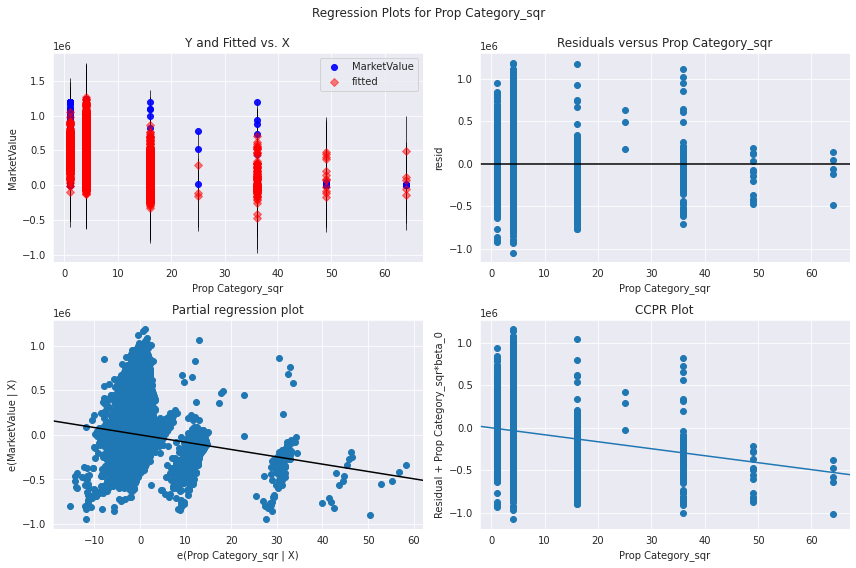

In [156]:
# MarketValue vs Valuation_type residual plots
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Prop Category_sqr', fig=fig)

The partial regressing plot shows a random pattern. This tells us the residual supports a linear regression and was fitted well with out data.

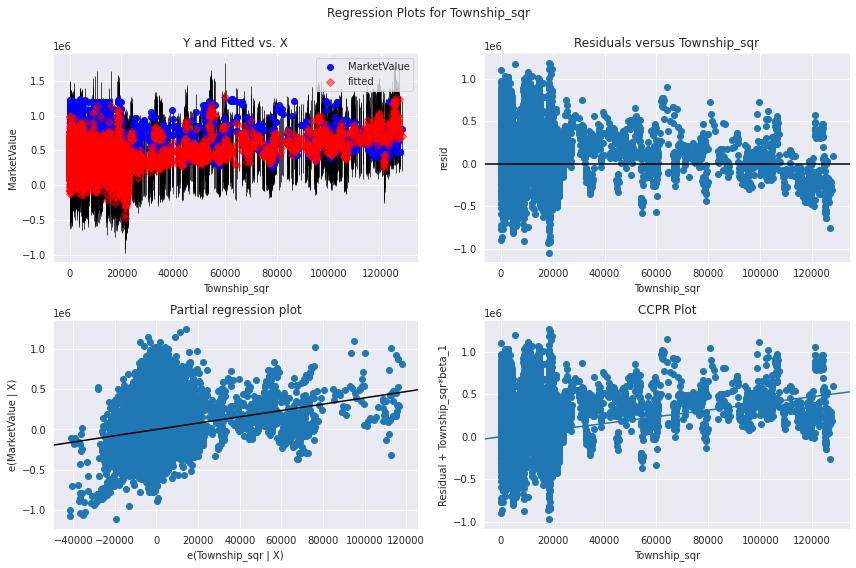

In [157]:
#Supp RollNo vs MarketValue

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Township_sqr', fig=fig)

In the partial plot, we see the random pattern indicating a decent fit to the data

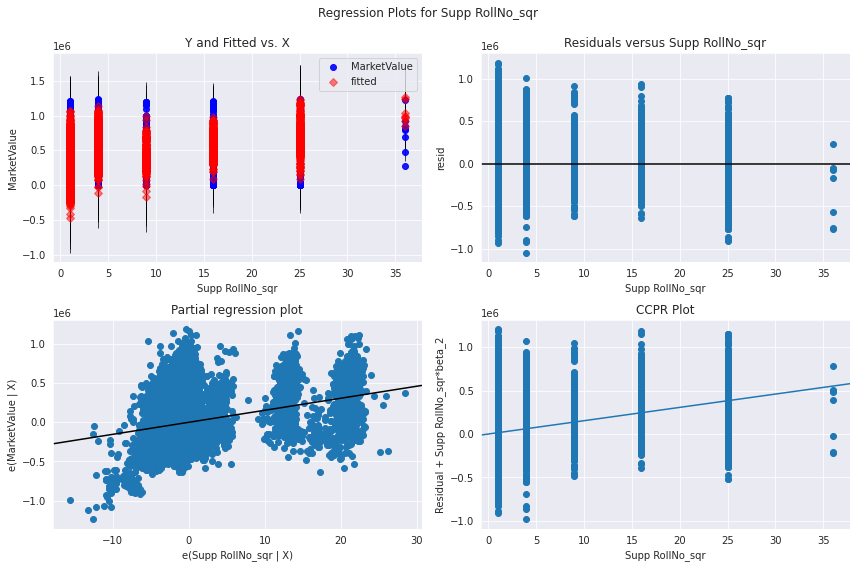

In [158]:
# Cycle vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Supp RollNo_sqr', fig=fig)

The residual plots of MarketValue and Cycle shows a random pattern, which means it is the good fit for the linear model.

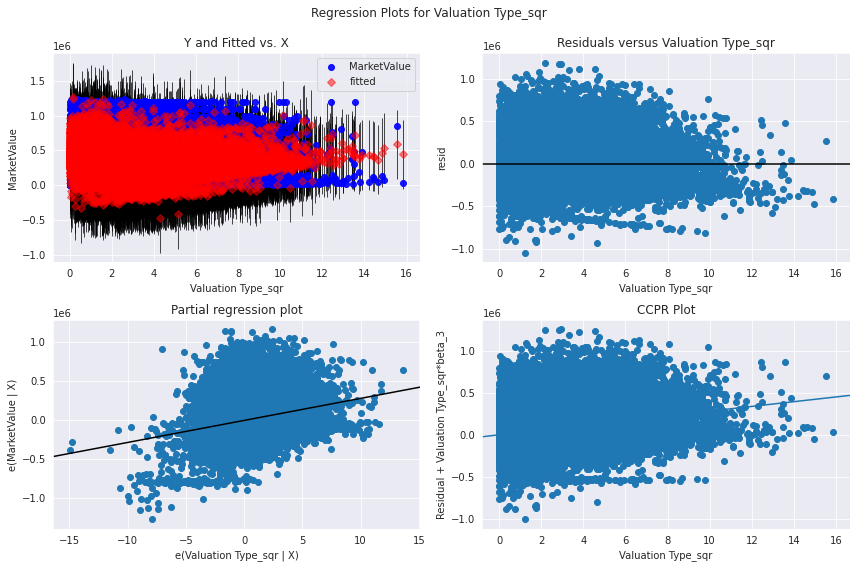

In [159]:
#Ward vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Valuation Type_sqr', fig=fig)

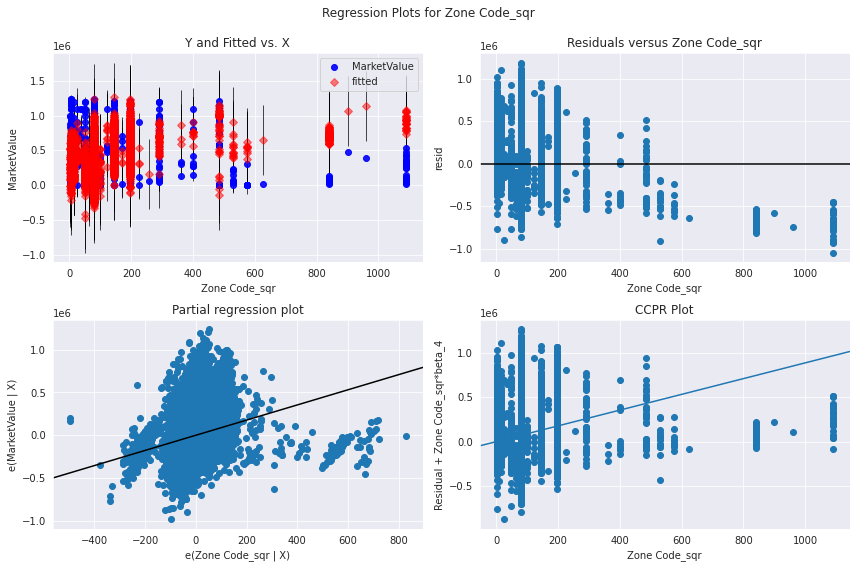

In [160]:
#Owner Name vs MarketValue
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Zone Code_sqr', fig=fig)

The plot is not randomly plotted. This means linar regresion was not a good fit for the data.

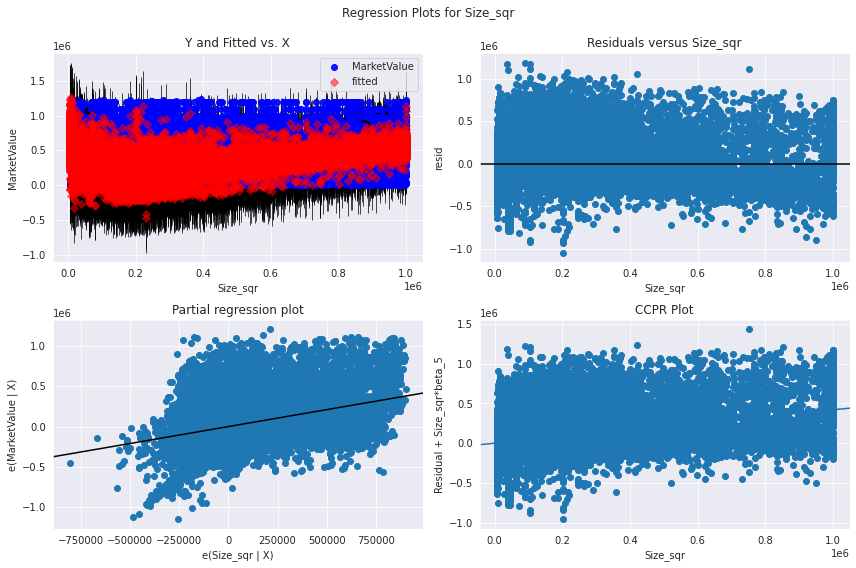

In [161]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Size_sqr', fig=fig)

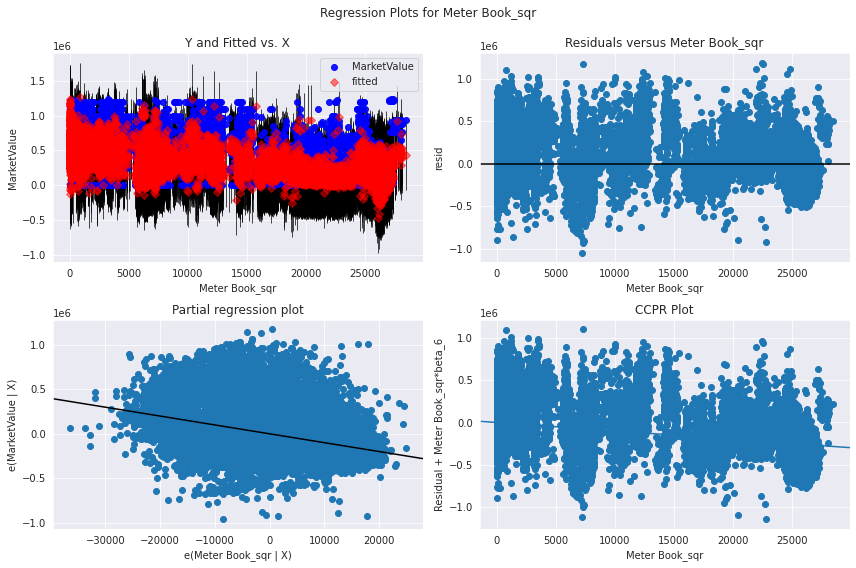

In [162]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Meter Book_sqr', fig=fig)

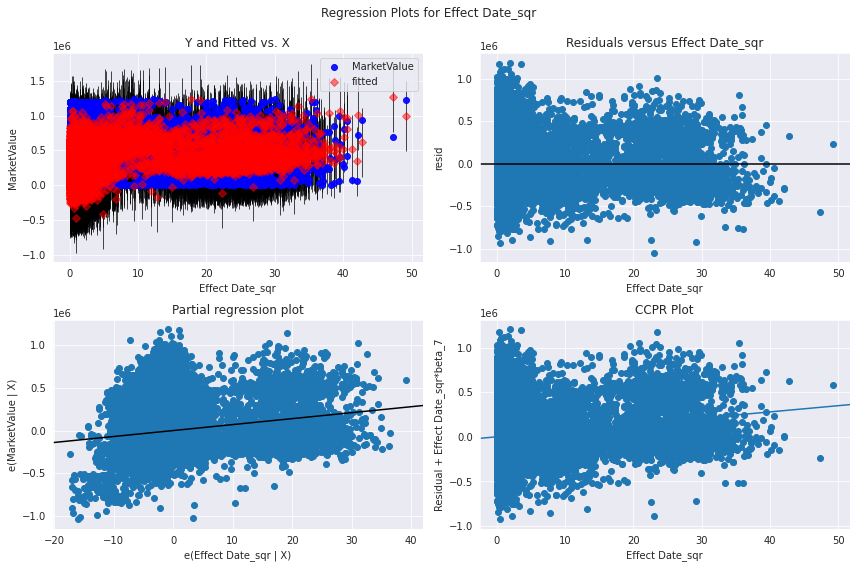

In [163]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Effect Date_sqr', fig=fig)

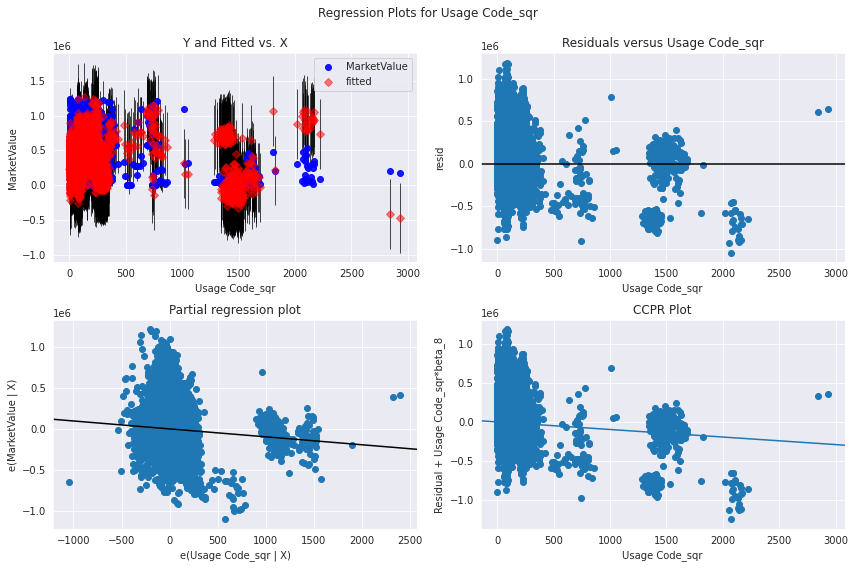

In [164]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Usage Code_sqr', fig=fig)

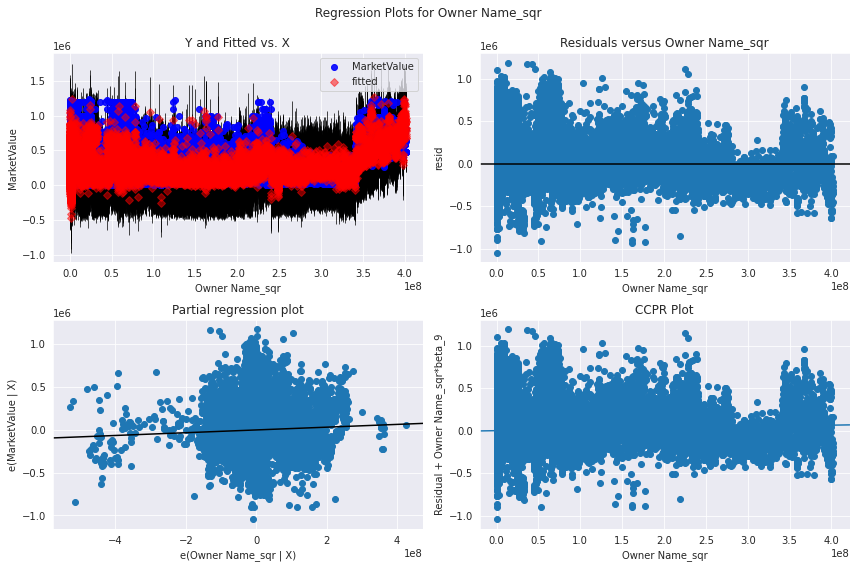

In [167]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(result_one, 'Owner Name_sqr', fig=fig)

The standardised errors are independent of all the features as seen from the plots from above. This means that the coefficients of these features are unbiased and will be suitable to weight these features in our regression model. 

##  **Model testing:**

In [153]:
model = sm.OLS(y_test, X_test_square)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              1742.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:13:26   Log-Likelihood:                     -1.5771e+05
No. Observations:               11447   AIC:                                  3.155e+05
Df Residuals:                   11433   BIC:                                  3.156e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Township_sqr           2.5074      0.159     15.777      0.000       2.196       2.819
Owner Name_sqr         0.0002   2.68e-05      8.186      0.000       0.000       0.000
Prop Category_sqr  -2.015e+04    556.023    -36.240      0.000   -2.12e+04   -1.91e+04
Physical Addr_sqr     -0.1556      0.009    -16.627      0.000      -0.174      -0.137
Size_sqr               0.2819      0.010     27.191      0.000       0.262       0.302
Supp RollNo_sqr     7843.9790    490.623     15.988      0.000    6882.273    8805.685
Effect Date_sqr     2262.8955    344.201      6.574      0.000    1588.203    2937.589
Zone Code_sqr        222.3231     35.232      6.310      0.000     153.262     291.384
Usage Code_sqr        25.7504     11.373      2.264      0.024       3.458      48.043
Valuation Type_sqr  1883.0589   1110.517      1.696      0.090    -293.746    4059.864
Ward_sqr              -0.2313      0.047     -4.974      0.000      -0.322      -0.140
Cycle_sqr             -8.8159      3.111     -2.833      0.005     -14.915      -2.717
Meter Book_sqr        -8.9769      0.470    -19.113      0.000      -9.898      -8.056
Val Cnt_sqr         4.411e+05   9074.171     48.612      0.000    4.23e+05    4.59e+05
==============================================================================
Omnibus:                     1461.879   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3230.068
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       5.097   Cond. No.                     6.37e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the test data, the model performed well with the R-square value of $0.681$

In [154]:
#Fitting on testing but using chosen variables from training data
model = sm.OLS(y_test, X_test_square[remaining_var_two])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MarketValue   R-squared (uncentered):                   0.614
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                              1816.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:13:28   Log-Likelihood:                     -1.5881e+05
No. Observations:               11447   AIC:                                  3.176e+05
Df Residuals:                   11437   BIC:                                  3.177e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prop Category_sqr  -8926.4793    544.855    -16.383      0.000   -9994.489   -7858.469
Township_sqr           3.7465      0.170     21.975      0.000       3.412       4.081
Supp RollNo_sqr     1.523e+04    513.300     29.662      0.000    1.42e+04    1.62e+04
Valuation Type_sqr  2.946e+04   1023.341     28.789      0.000    2.75e+04    3.15e+04
Zone Code_sqr        899.3754     34.255     26.255      0.000     832.229     966.522
Size_sqr               0.4313      0.011     39.988      0.000       0.410       0.452
Meter Book_sqr       -10.0257      0.271    -36.948      0.000     -10.558      -9.494
Effect Date_sqr     7064.8322    359.856     19.632      0.000    6359.453    7770.211
Usage Code_sqr       -91.6102     11.656     -7.859      0.000    -114.459     -68.762
Owner Name_sqr         0.0002   2.94e-05      6.475      0.000       0.000       0.000
==============================================================================
Omnibus:                     1106.066   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1549.361
Skew:                           0.773   Prob(JB):                         0.00
Kurtosis:                       3.926   Cond. No.                     6.66e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has a higher R-squared value on test data, thus this shows us that the trained model is not overfitting on the trained dataset.

<a id='Conclusion'></a>

# **Conclusion:**

Based on our [final model](#linreg2), MarketValue =  1.418E+05(Supp RollNo) + 6.113E04+05(Valuation Type) + 9.508E4(Prop Category)-  3445.8(Cycle) - 1.6639(Owner Name) -318.41(Ward) + 0.0459(Size), this clearly shows that not all weights are zero, thus leading to us rejecting our null hypothesis that where $B_{i}\  $ = 0 for all i. Based on our results, Supp Rollno, Valuation Type , Prop Category, Cycle, Owner Name and Ward and the Size are the only key determinants of the Market Value. According to the test results of our linear regression model the valuation type has a greatest positive influence on the Market Value, this is shown by the large coefficient value for this variable. Cycle has the greatest negative influence on the negative influence on the Market Value.